<a href="https://colab.research.google.com/github/Akshata-Varude/Mobile-Price-Range-Prediction-by-Classification-Model/blob/main/Mobile_Price_Range_Prediction_by_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **MOBILE PRICE RANGE PREDICTION**



<html>
    <img src="https://images.pexels.com/photos/3707744/pexels-photo-3707744.jpeg?auto=compress&cs=tinysrgb&w=600" alt="Your Image Description" width="1000" height="450">
</html>

##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1** - Arkadyuti Dhara
##### **Team Member 2** - Akshata Vivek Varude



# **Project Summary -**

The mobile phone industry is fiercely competitive, and the price of a mobile phone is determined by multiple factors such as battery power, Bluetooth, camera quality, and screen size. To investigate the factors that influence the price range of mobile phones, a study was conducted. The study utilized a dataset containing approximately 21 variables to forecast the price range of mobile phones, which are categorized as low, medium, high, and very high.

In this project, we aim to develop a classification model for mobile price range prediction. In this project, we provided with dataset containing 21 features like information on battery power, bluetooth, info on the front camera and back camera, mobile is touch screen or not, pixel resolution by height and width, etc.

In this project following steps are involved.
1. Data Exploration and Inspection of the raw data.
2. Understanding variables and data wrangling by finding null/missing values, and finding duplicates.
3. Exploratory Data Analysis(EDA) involves data visualization, and understanding the relationship between variables.
4. Hypothesis testing.
5. Feature engineering and data preprocessing.
6. ML implementation, we implement a 3 ml model

      *   Logistic Regression
      *   Randomforest Classifier
      *   XG Boost Classifier  

The outcome is a valuable tool that aids consumers and manufacturers in navigating the mobile phone market more effectively. With the continuous evolution of mobile technology, this project holds the potential for ongoing enhancements and contributions to the field of predictive analytics.

# **GitHub Link -**

https://github.com/Akshata-Varude/Mobile-Price-Range-Prediction-by-Classification-Model/blob/e9130db564a94df43ac7f9034d44e9c46f7690c3/Mobile_Price_Range_Prediction_by_Classification_Model.ipynb

# **Problem Statement**


**In the current competitive mobile phone market, determining the optimal price range for a new mobile phone model is a crucial challenge for manufacturers and retailers. Pricing a mobile phone too high can deter potential buyers, while pricing it too low may result in missed revenue opportunities. Therefore, the primary objective of this project is to create a predictive model that can estimate the appropriate price range for a mobile phone, considering a wide array of technical features and characteristics.**

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
%matplotlib inline


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


# Mute the sklearn and IPython warnings
import warnings
warnings.filterwarnings('ignore', module='sklearn')
warnings.filterwarnings('ignore', module='IPython')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [ ]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/AB Classification Project/data_mobile_price_range.csv')

### Dataset First View

In [ ]:
# Dataset First Look
# Set the option to display all columns
pd.set_option('display.max_columns', None)
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2   2         20       756  2549     9     7         19   
1        136        3   6        905      1988  2631    17     3          7   
2        145        5   6       1263      1716  2603    11     2          9   
3        131        6   9       1216      1786  2769    16     8         11   
4        141        2  14       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1

First five rows and columns of dataset.

In [ ]:
df.tail()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
1995    0.8        106        6  14       1222      1890   668    13     4   
1996    0.2        187        4   3        915      1965  2032    11    10   
1997    0.7        108        8   3        868      1632  3057     9     1   
1998    0.1        145        5   5        336       670   869    18    10   
1999    0.9        168        6  16        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3

Last five rows and columns of dataset.

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
rows, col = df.shape
print ("Dimensions of dataset: {}" . format (df.shape))
print ('Rows:', rows, '\nColumns:', col)

Dimensions of dataset: (2000, 21)
Rows: 2000 
Columns: 21


In this dataset there are 2000 rows and 21 columns.

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

In dataset there is no duplicate values.

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

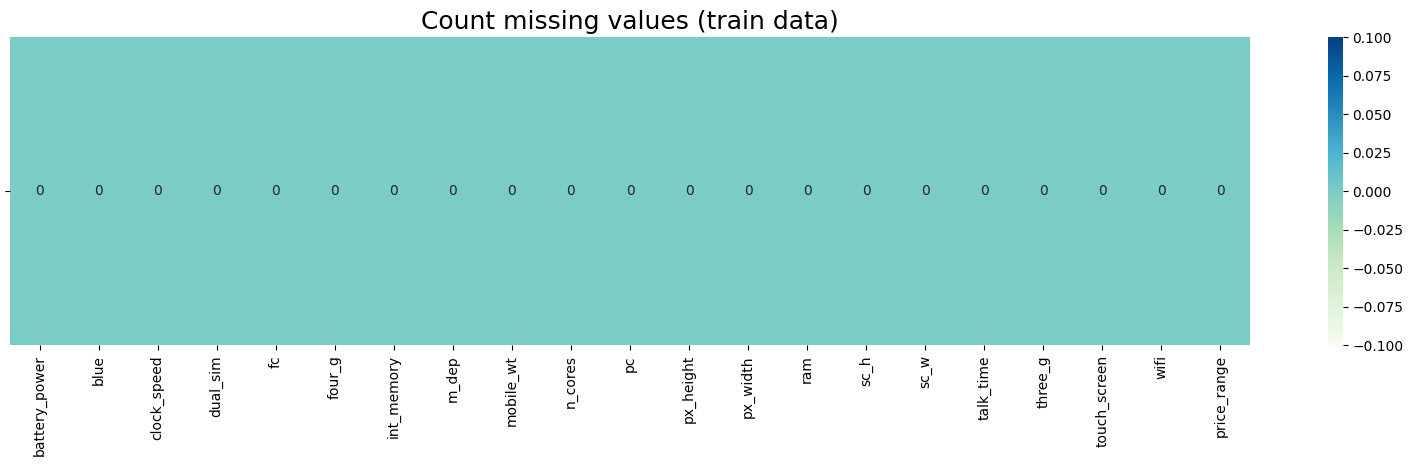

In [ ]:
# Visualizing the missing values
# Missing values (train)
plt.figure(figsize=(20,4))
sns.heatmap((df.isna().sum()).to_frame(name='').T,cmap='GnBu', annot=True,
             fmt='0.0f').set_title('Count missing values (train data)', fontsize=18)
plt.show()

### What did you know about your dataset?

This dataset contains 2000 rows and 21 columns.

2 columns contains float values and 19 columns contains integer values.

There is no duplicate values present in dataset.

There is no missing values and null values are present.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Describe
# Statistical details
df.iloc[:, :-1].describe().T.sort_values(by='std', ascending = False)

count        mean          std    min      25%     50%  \
ram            2000.0  2124.21300  1084.732044  256.0  1207.50  2146.5   
px_height      2000.0   645.10800   443.780811    0.0   282.75   564.0   
battery_power  2000.0  1238.51850   439.418206  501.0   851.75  1226.0   
px_width       2000.0  1251.51550   432.199447  500.0   874.75  1247.0   
mobile_wt      2000.0   140.24900    35.399655   80.0   109.00   141.0   
int_memory     2000.0    32.04650    18.145715    2.0    16.00    32.0   
pc             2000.0     9.91650     6.064315    0.0     5.00    10.0   
talk_time      2000.0    11.01100     5.463955    2.0     6.00    11.0   
sc_w           2000.0     5.76700     4.356398    0.0     2.00     5.0   
fc             2000.0     4.30950     4.341444    0.0     1.00     3.0   
sc_h           2000.0    12.30650     4.213245    5.0     9.00    12.0   
n_cores        2000.0     4.52050     2.287837    1.0     3.00     4.0   
clock_speed    2000.0     1.52225     0.816004    0.5     0.70     1.5   
touch_screen   2000.0     0.50300     0.500116    0.0     0.00     1.0   
blue           2000.0     0.49500     0.500100    0.0     0.00     0.0   
wifi           2000.0     0.50700     0.500076    0.0     0.00     1.0   
dual_sim       2000.0     0.50950     0.500035    0.0     0.00     1.0   
four_g         2000.0     0.52150     0.499662    0.0     0.00     1.0   
three_g        2000.0     0.76150     0.426273    0.0     1.00     1.0   
m_dep          2000.0     0.50175     0.288416    0.1     0.20     0.5   

                   75%     max  
ram            3064.50  3998.0  
px_height       947.25  1960.0  
battery_power  1615.25  1998.0  
px_width       1633.00  1998.0  
mobile_wt       170.00   200.0  
int_memory       48.00    64.0  
pc               15.00    20.0  
talk_time        16.00    20.0  
sc_w              9.00    18.0  
fc                7.00    19.0  
sc_h             16.00    19.0  
n_cores           7.00     8.0  
clock_speed       2.20     3.0  
touch_screen      1.00     1.0  
blue              1.00     1.0  
wifi              1.00     1.0  
dual_sim          1.00     1.0  
four_g            1.00     1.0  
three_g           1.00     1.0  
m_dep             0.80     1.0

In [ ]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

### Variables Description

Here's a brief description of each column in the "Mobile Price Range Prediction" dataset:

*  **Battery_power** - Total energy a battery can store in one time measured in mAh
*   **Blue** - Has bluetooth or not
*   **Clock_speed** - speed at which microprocessor executes instructions
*   **Dual_sim** - Has dual sim support or not
*   **Fc** - Front Camera mega pixels
*  **Four_g** - Has 4G or not
*  **Int_memory** - Internal Memory in Gigabytes
*   **M_dep** - Mobile Depth in cm
*   **Mobile_wt** - Weight of mobile phone
*   **N_cores** - Number of cores of processor
*   **Pc** - Primary Camera mega pixels
*   **Px_height** - Pixel Resolution Height
*   **Px_width** - Pixel Resolution Width
*   **Ram** - Random Access Memory in Mega
*   **Touch_screen** - Has touch screen or not
*   **Wifi** - Has wifi or not
*  **Sc_h** - Screen Height of mobile in cm
*   **Sc_w** - Screen Width of mobile in cm
*   **Talk_time** - longest time that a single battery charge will last when you are
*   **Three_g** - Has 3G or not
*   **Wifi** - Has wifi or not
*  **Price_range** - This is the target variable with value of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print(df.apply(lambda col:col.unique()))

battery_power    [842, 1021, 563, 615, 1821, 1859, 1954, 1445, ...
blue                                                        [0, 1]
clock_speed      [2.2, 0.5, 2.5, 1.2, 1.7, 0.6, 2.9, 2.8, 2.1, ...
dual_sim                                                    [0, 1]
fc               [1, 0, 2, 13, 3, 4, 5, 7, 11, 12, 16, 6, 15, 8...
four_g                                                      [0, 1]
int_memory       [7, 53, 41, 10, 44, 22, 24, 9, 33, 17, 52, 46,...
m_dep            [0.6, 0.7, 0.9, 0.8, 0.1, 0.5, 1.0, 0.3, 0.4, ...
mobile_wt        [188, 136, 145, 131, 141, 164, 139, 187, 174, ...
n_cores                                   [2, 3, 5, 6, 1, 8, 4, 7]
pc               [2, 6, 9, 14, 7, 10, 0, 15, 1, 18, 17, 11, 16,...
px_height        [20, 905, 1263, 1216, 1208, 1004, 381, 512, 38...
px_width         [756, 1988, 1716, 1786, 1212, 1654, 1018, 1149...
ram              [2549, 2631, 2603, 2769, 1411, 1067, 3220, 700...
sc_h             [9, 17, 11, 16, 8, 13, 19, 5, 14, 18, 7, 10, 

In [ ]:
unique = df.nunique()
unique.to_frame().T

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0           1094     2           26         2  20       2          63     10   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        121        8  21       1137      1109  1562    15    19         19   

   three_g  touch_screen  wifi  price_range  
0        2             2     2            4

## 3. ***Data Wrangling***

### **Data Wrangling Code**

In [ ]:
num_cols = [column_name for column_name in df.columns if len(df[column_name].unique()) >= 10]
cat_cols = [column_name for column_name in df.columns if len(df[column_name].unique()) < 10]

print("Numerical Columns:")
print(num_cols)

print("\nCategorical Columns with < 30 unique values:")
print(cat_cols)

Numerical Columns:
['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

Categorical Columns with < 30 unique values:
['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi', 'price_range']


Categorical Columns:
   - 'blue': This column appears to represent a binary category (yes/no or 1/0) for the presence of Bluetooth.
   - 'dual_sim': This column seems to indicate whether the phone has dual SIM support, another binary category.
   - 'four_g': Similar to 'blue' and 'dual_sim', this column appears to represent the presence of 4G support, making it binary.
   - 'three_g': Just like 'four_g', this column probably indicates the presence of 3G support, so it's also binary.
   - 'touch_screen': This column appears to represent a binary category, indicating whether the phone has a touch screen.
   - 'wifi': This column likely represents the presence of Wi-Fi, making it binary.

Numerical Columns:
   - 'battery_power': This column seems to represent a continuous numerical value indicating the battery power.
   - 'clock_speed': This column likely represents a continuous numerical value for the clock speed of the phone's processor.
   - 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time': These columns appear to represent various numerical attributes related to the phone's specifications.

Target Variable:
   - 'price_range': This column is target variable for price range demand prediction and is categorical.




In the dataset some numeric features like **m_dep, px height, and sc_w,** having minimum values did not make sense. So changing minimum values.

In [ ]:
df.m_dep.describe()

count    2000.000000
mean        0.501750
std         0.288416
min         0.100000
25%         0.200000
50%         0.500000
75%         0.800000
max         1.000000
Name: m_dep, dtype: float64

In [ ]:
# Find values below 0.5 cm
below_threshold = df["m_dep"][df["m_dep"] < 0.5]

# Set values below 0.5 cm to 0.5
df.loc[df["m_dep"] < 0.5, "m_dep"] = 0.5

# Count the number of values below 0.5 cm (after the update)
num_below_threshold = len(below_threshold)

# Print the number of values below 0.5 cm
print("Number of values below 0.5 cm in 'm_dep' feature: ", num_below_threshold)

Number of values below 0.5 cm in 'm_dep' feature:  900


We consider the **minimum Mobile Depth** to be **0.5 centimeters**.

The minimum range of mobile phone depth varies depending on the manufacturer, model, and specific phone design. However, most smartphones have a thickness (depth) in the range of **7mm to 10mm**. Some high-end models may be thinner than this range, with depths as low as **6mm or even less**

In [ ]:
df.px_height.describe()

count    2000.000000
mean      645.108000
std       443.780811
min         0.000000
25%       282.750000
50%       564.000000
75%       947.250000
max      1960.000000
Name: px_height, dtype: float64

In [ ]:
# Find values below 65 pixels
below_threshold = df["px_height"][df["px_height"] < 65]

# Set values below 65 pixels to 65 pixels
df.loc[df["px_height"] < 65, "px_height"] = 65

# Count the number of values below 65 pixels (after the update)
num_below_threshold = len(below_threshold)

# Print the number of values below 65 pixels
print("Number of values below 65 pixels  in px_height feature: ", num_below_threshold)

Number of values below 65 pixels  in px_height feature:  90


We considered the dimensions of the **keypad mobile (96 x 65 pixels, 3:2 ratio)** as the **minimum of Pixel Resolution**. **65 pixels**

In [ ]:
df.sc_w.describe()

count    2000.000000
mean        5.767000
std         4.356398
min         0.000000
25%         2.000000
50%         5.000000
75%         9.000000
max        18.000000
Name: sc_w, dtype: float64

In [ ]:
# Replace values below 2.54 cm with 2.54 cm
df.loc[df["sc_w"] < 2.54, "sc_w"] = 2.54

According to the **keypad mobile screen resolution (96 x 65 pixels, 3:2 ratio)**, We will consider the **minimum Screen Width** to be **1 inch = 2.54 centimeters**.


### What all manipulations have you done and insights you found?

We have created a separate columns for Numerical and Categorical Variables to work accordingly.It will help to understand the basic relationship between the features(defined as Categorical and Numerical) and the target variables.

We consider the minimum Mobile Depth to be 0.5 centimeters. So we convert values less than 0.5 cm into 0.5cm.

We considered the dimensions of the keypad mobile (96 x 65 pixels, 3:2 ratio) as the minimum of Pixel Resolution.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

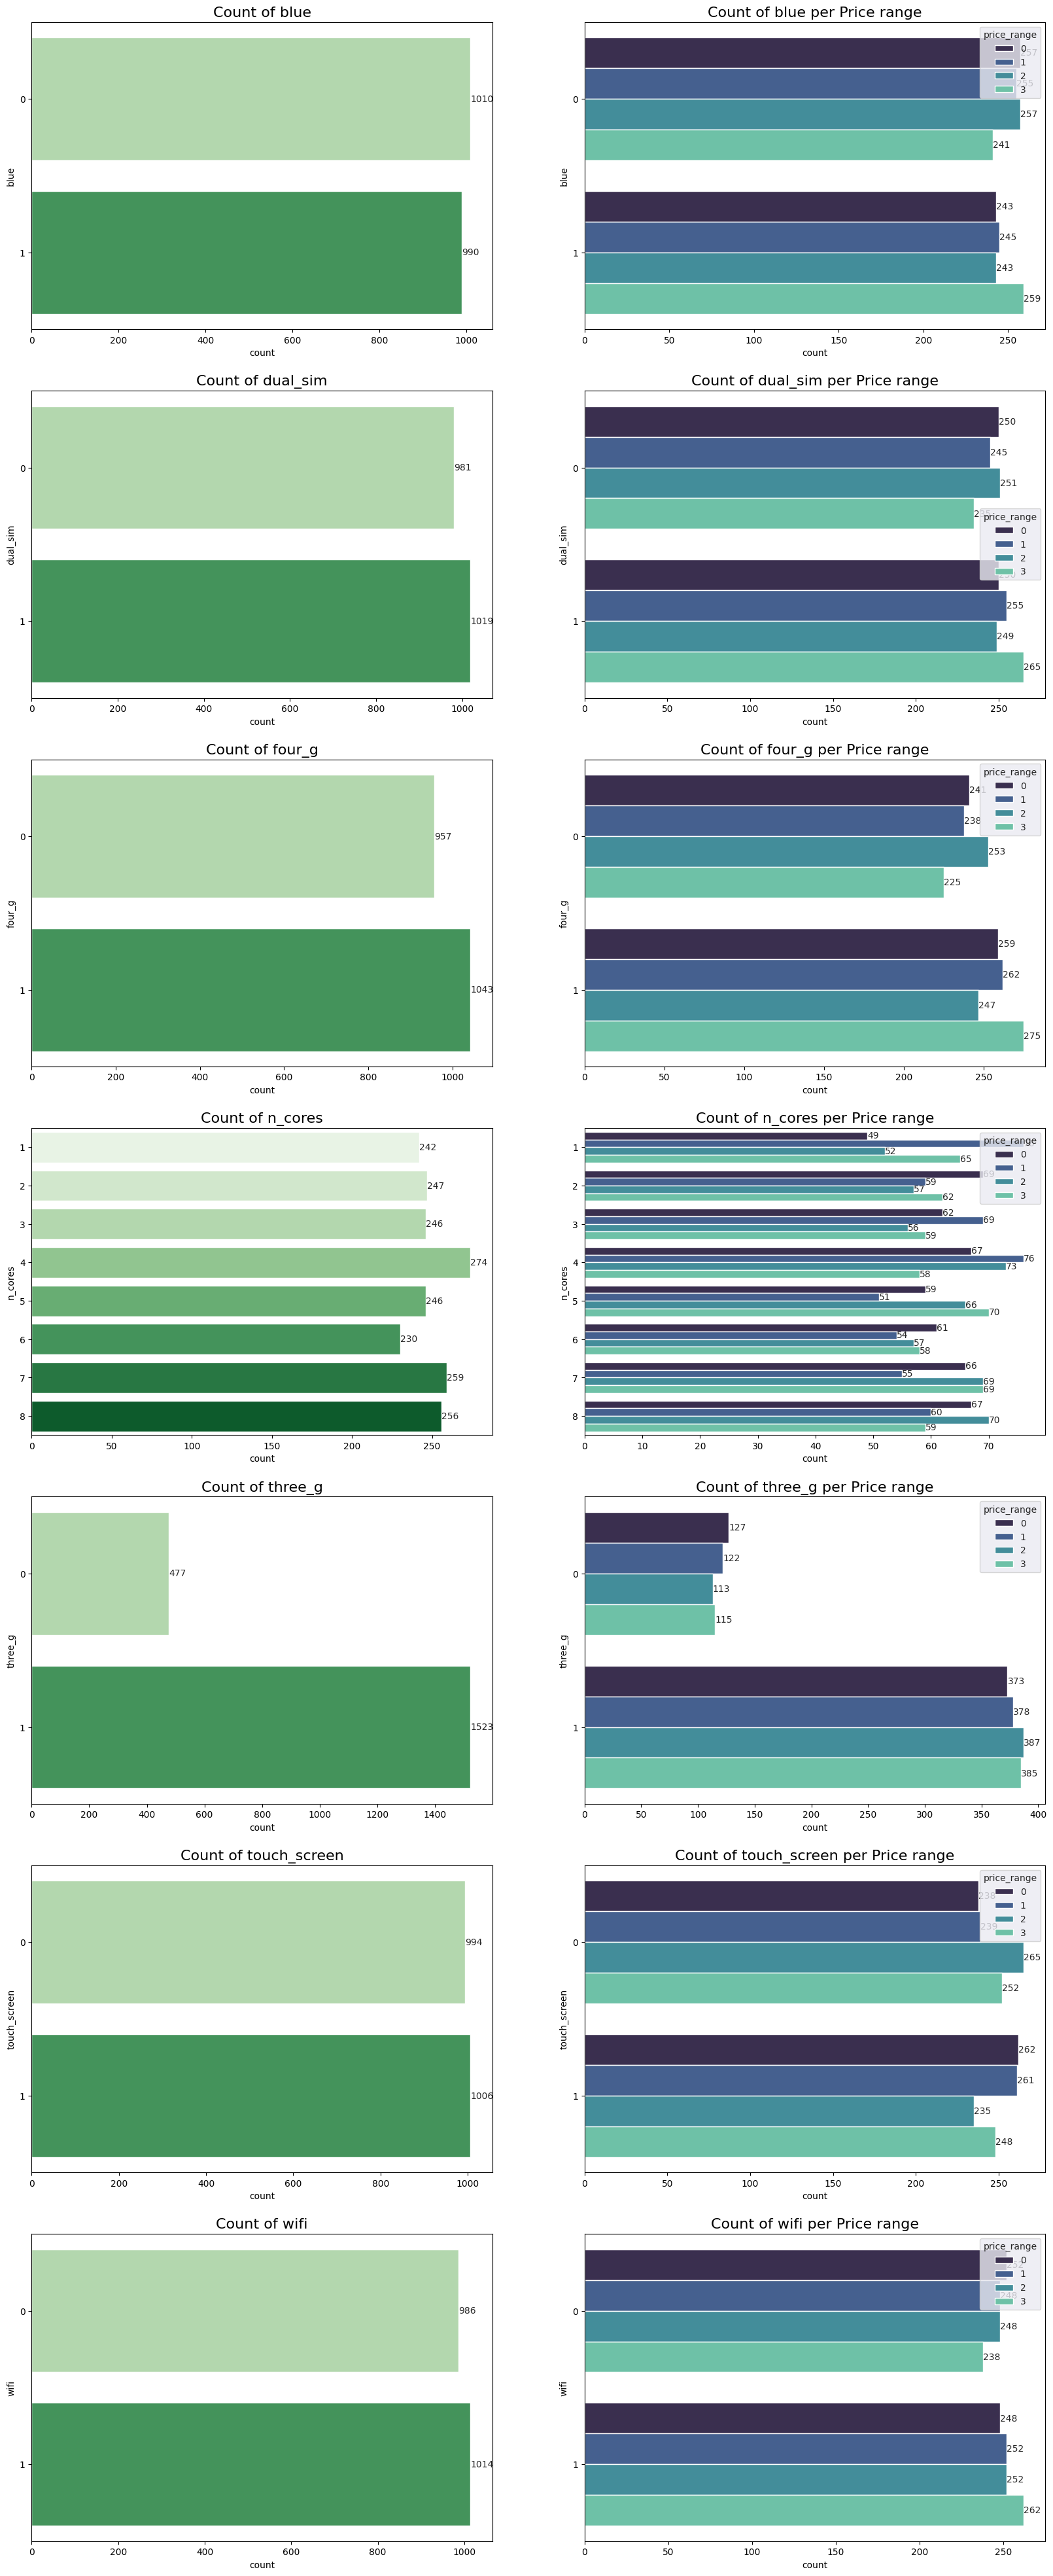

In [ ]:
# Replace cat_cols with your list of categorical feature names excluding 'price_range'
cat_cols = ['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi']

# Create subplots
fig, axes = plt.subplots(len(cat_cols), 2, figsize=(20, 50))
sns.set_style('darkgrid')
idx = 0

for col in cat_cols:
    # Count plot for the feature
    sns.countplot(data=df, y=col, palette='Greens', orient='h',
                  ax=axes[idx][0]).set_title(f'Count of {col}', fontsize=16)

    for container in axes[idx][0].containers:
        axes[idx][0].bar_label(container)

    # Count plot for the feature per Price range
    sns.countplot(data=df, y=col, palette='mako', orient='h', hue='price_range',
                  ax=axes[idx][1]).set_title(f'Count of {col} per Price range', fontsize=16)

    for container in axes[idx][1].containers:
        axes[idx][1].bar_label(container)

    idx += 1

plt.show()


##### 1. Why did you pick the specific chart?

A bar chart describes the comparisons between the discrete categories. One of the axis of the plot represents the specific categories being compared, while the other axis represents the measured values corresponding to those categories.

##### 2. What is/are the insight(s) found from the chart?


- **Bluetooth:** Mobile phones without Bluetooth are more common, with low-cost and high-cost phones being prevalent. Very high-cost phones often have Bluetooth.

- **Dual Sim:** Phones with Dual Sim are more frequent, while high-cost and low-cost phones dominate in this category. Very high-cost phones tend to have Dual Sim.

- **4G:** Phones with 4G are more common, and medium-cost phones often have 4G.

- **Number of Cores:** Phones with 4 cores are most frequent. High-cost phones have 4 cores, while medium-cost phones have other configurations.

- **3G:** Phones with 3G are more common, with high-cost phones often having 3G, and low-cost phones lacking it.

- **Touch Screen:** Phones with a touch screen are more common, with low-cost phones having them, while high-cost phones lack touch screens.

- **Wifi:** Phones with Wifi are more frequent, with very high-cost phones often having Wifi, while low-cost phones lack it.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain insight to help creating a positive business impact.

#### Chart - 2

In [ ]:
# Creating subplots with specified number of rows and columns
rows, cols = 5, 3
fig = sp.make_subplots(rows=rows, cols=cols, subplot_titles=num_cols)

# Loop through the columns and create distplots
for i, col in enumerate(num_cols):
    row_num = i // cols + 1
    col_num = i % cols + 1

    # Create a distplot with KDE for the current column
    distplot = ff.create_distplot([df[col]], [col], colors=["#A52A2A"])

    # Add the distplot to the corresponding subplot
    for trace in distplot['data']:
        fig.add_trace(trace, row=row_num, col=col_num)

# Update subplot layout
fig.update_layout(
    title="Distribution Plots with KDE",
    showlegend=False,
    autosize=False,
    width=900,
    height=1200
)

# Show the plot
fig.show()

##### 1. Why did you pick the specific chart?

Distribution plot are used to visually assess the distribution by comparing the observed data and expected outcomes.

##### 2. What is/are the insight(s) found from the chart?

m_dep,px_height are not normally distributed and other attributes are either positively or negatively skewed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain insight to help creating a positive business impact.

#### Chart - 3

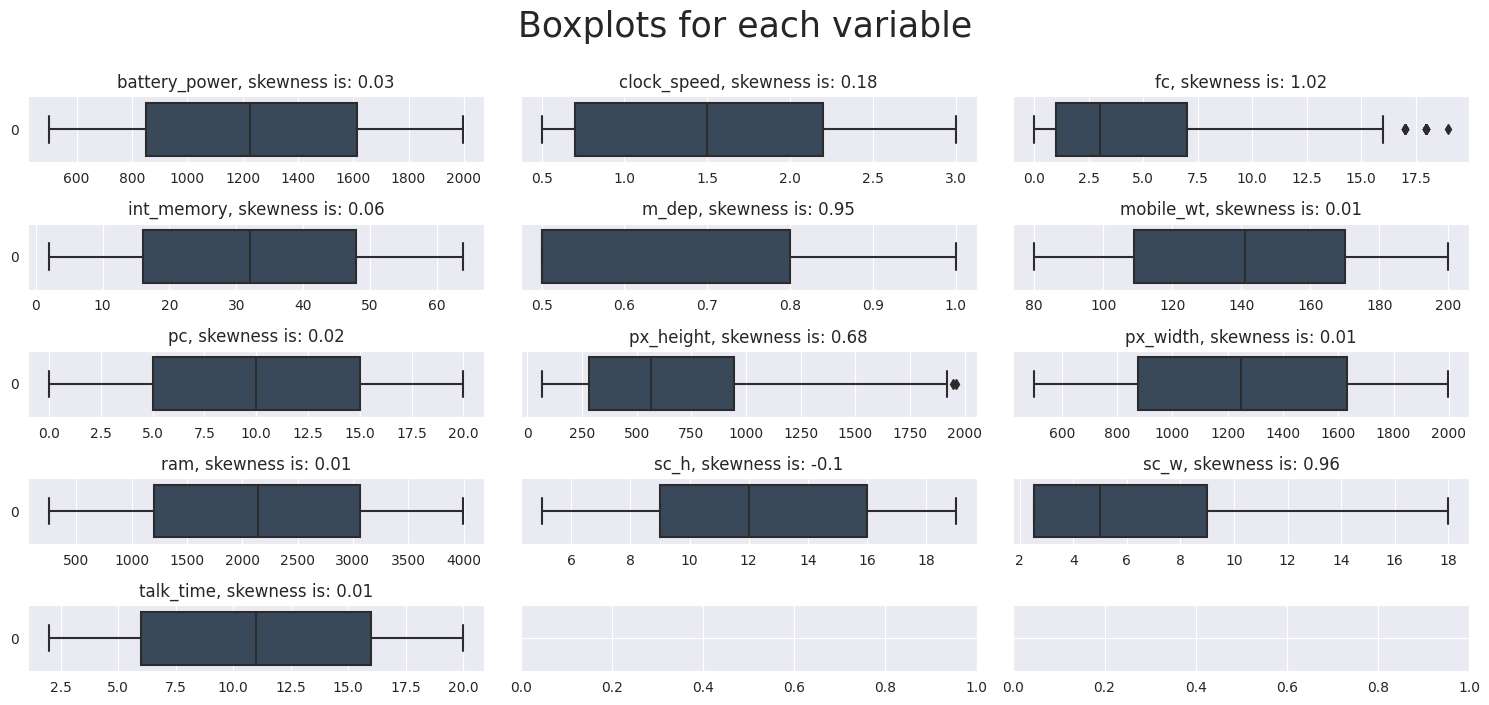

In [ ]:

sns.set_style('darkgrid')
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(15,7))
    fig.suptitle(suptitle, y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', color ='#34495E', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True), 2)))

boxplots_custom(dataset=df, columns_list=num_cols, rows=5, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()


##### 1. Why did you pick the specific chart?

Box plots provide a quick visual summary of the variability of values in a dataset. They show the median, upper and lower quartiles, minimum and maximum values, and any outliers in the dataset.

#### Chart - 4

<ipython-input-30-45f80baec5ef>:8: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.



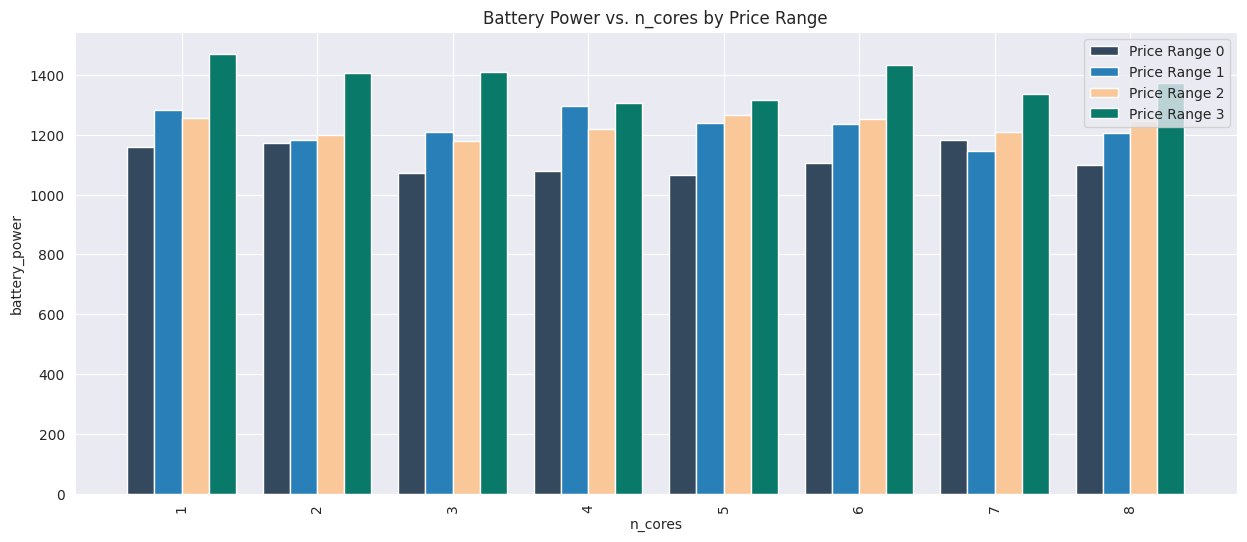

In [ ]:

# Define custom colors for each price range
colors = ['#34495E', '#2980B9', '#FAC898', '#097969']

# Group the data by 'n_cores' and 'price_range' and calculate the mean of 'battery_power'
grouped_data = df.groupby(['n_cores', 'price_range'])['battery_power'].mean().reset_index()

# Pivot the data to create a matrix for plotting
pivot_data = grouped_data.pivot('n_cores', 'price_range', 'battery_power')

# Create the bar plot
fig, ax = plt.subplots(figsize=(15, 6))
bar_width = 0.2
index = np.arange(len(pivot_data.index))

for i, price_range in enumerate(pivot_data.columns):
    ax.bar(index + i * bar_width, pivot_data[price_range], bar_width, label=f'Price Range {price_range}', color=colors[i])

ax.set_xlabel('n_cores')
ax.set_ylabel('battery_power')
ax.set_title('Battery Power vs. n_cores by Price Range')
ax.set_xticks(index + (bar_width * (len(pivot_data.columns) - 1)) / 2)
ax.set_xticklabels(pivot_data.index)
ax.legend()
plt.xticks(rotation=90)
plt.show()


##### 1. Why did you pick the specific chart?

Show the counts of observations in each categorical bin using bars.

##### 2. What is/are the insight(s) found from the chart?

As we can see in this chart that price range 3 has higher battery power than other.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain insight to help creating a positive business impact.

#### Chart - 5

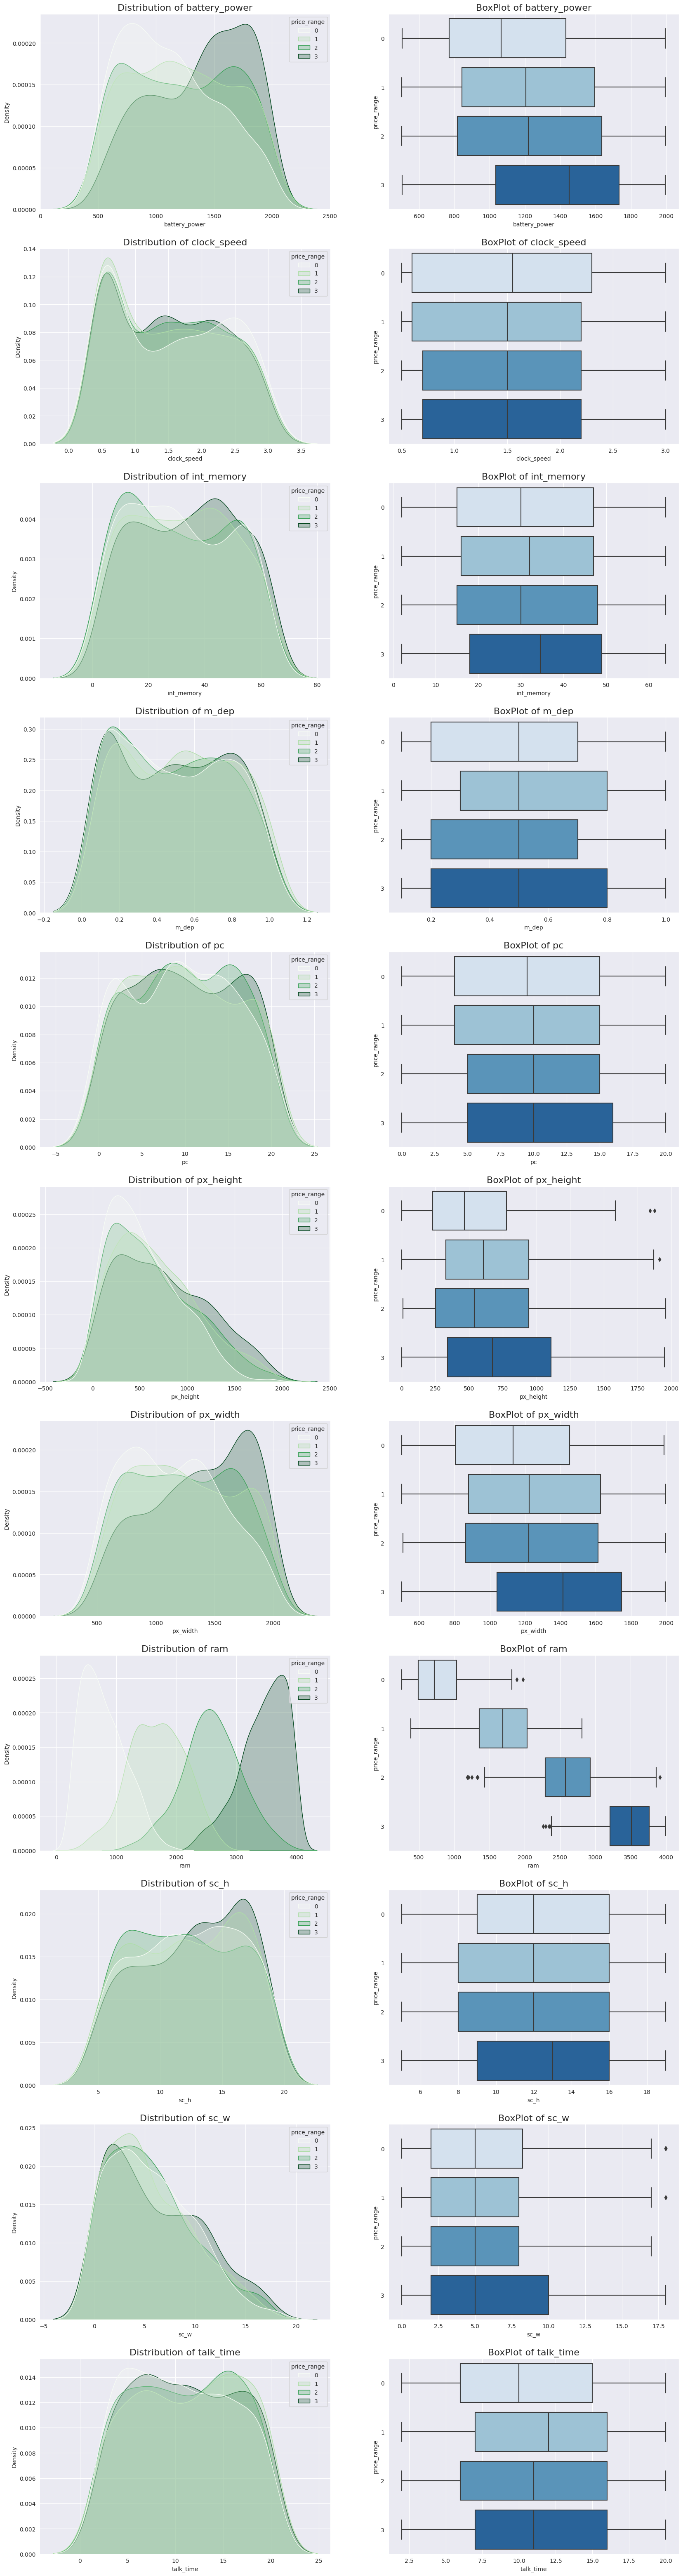

In [ ]:
# Replace num_cols with your list of numerical feature names
num_cols = ['battery_power', 'clock_speed', 'int_memory', 'm_dep', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

# Create subplots
fig, axes = plt.subplots(len(num_cols), 2, figsize=(20, 80))
sns.set_style('darkgrid')
idx = 0

for col in num_cols:
    # Kernel Density Estimate (KDE) plot
    sns.kdeplot(data=df, x=col, palette='Greens', fill=True, hue='price_range',
                ax=axes[idx][0]).set_title(f'Distribution of {col}', fontsize=16)

    # Boxplot
    sns.boxplot(data=df, x=col, palette='Blues', y='price_range', orient='h',
                ax=axes[idx][1]).set_title(f'BoxPlot of {col}', fontsize=16)

    idx += 1

plt.show()


##### 1. Why did you pick the specific chart?

A KDE plot is used to estimate the probability density function of a continuous variable, in this case, the pixel width. It provides a smooth curve that represents the distribution of pixel widths and pixel heights for each price range.

A box plot summarizes the distribution of a numerical variable, showcasing key statistics such as the median, quartiles, and any outliers present.

##### 2. What is/are the insight(s) found from the chart?

**Distribution Patterns:**  Features like int_memory, mobile_wt, pc, and talk time exhibit a normal distribution across all price ranges.

**Battery Power:**  Prices 0-3 correlate with specific battery_power ranges (800-1400, 800-1550, 800-1600, 1050-1700 mAh).

**RAM:**  Specific ram ranges associated with price ranges 0-3 (250-1600, 450-2800, 1450-3800, 2450-4000 MB).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain insight to help creating a positive business impact.

#### Chart - 6

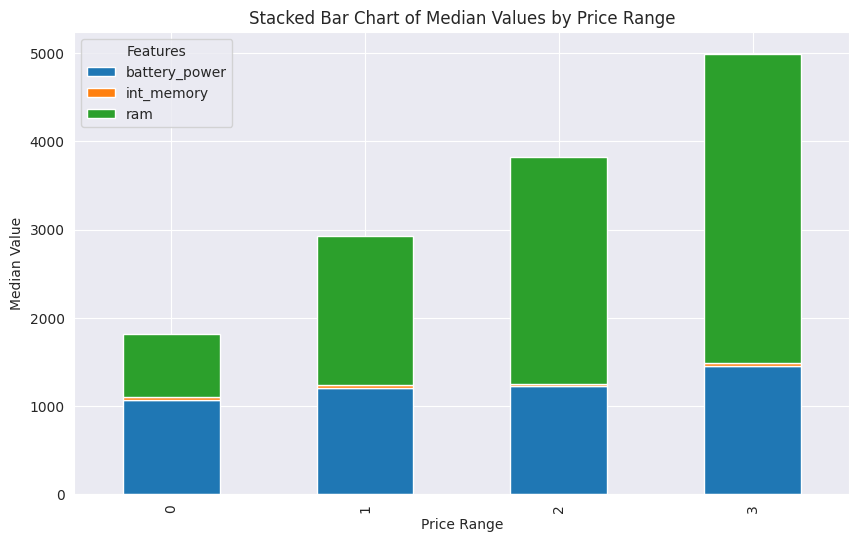

In [ ]:
# Create a pivot table with 'price_range' as the index and aggregating three numerical columns
pivot_table = pd.pivot_table(df, index='price_range', values=['ram', 'battery_power', 'int_memory'], aggfunc='median')

# Create a stacked bar chart
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Price Range')
plt.ylabel('Median Value')
plt.title('Stacked Bar Chart of Median Values by Price Range')
plt.legend(title='Features')
plt.show()



##### 1. Why did you pick the specific chart?

This type of chart is suitable for visualizing the count or frequency of different categories within each price range.

##### 2. What is/are the insight(s) found from the chart?

Internal memory is more or less same among each price range but battery power and ram are varied in different price range.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain insight to help creating a positive business impact.

#### Chart - 7

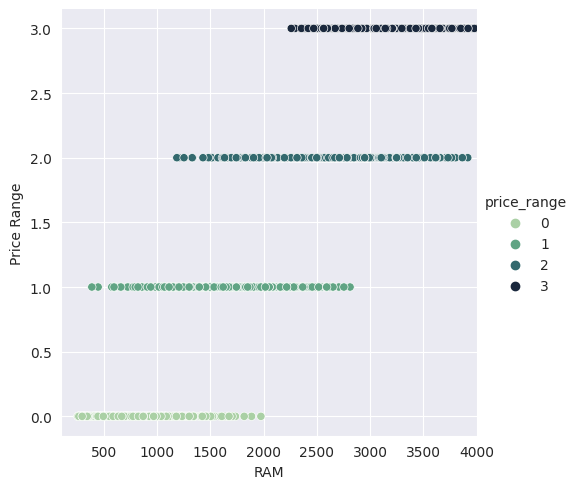

In [ ]:
# Create scatter plot
sns.relplot(data=df, x="ram", y="price_range", hue="price_range", palette="ch:r=-.5, l=.75")

# Set x-axis limits
plt.xlim(100, 4000)

# Add axis labels
plt.xlabel("RAM", fontsize=10)
plt.ylabel("Price Range", fontsize=10)

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Scatter plots' primary uses are to observe and show relationships between two numeric variables. The dots in a scatter plot not only report the values of individual data points, but also patterns when the data are taken as a whole.

##### 2. What is/are the insight(s) found from the chart?

By increasing the value of ram from 256-4000 megabytes, the price range will increase.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain insight to help creating a positive business impact.

#### Chart - 8

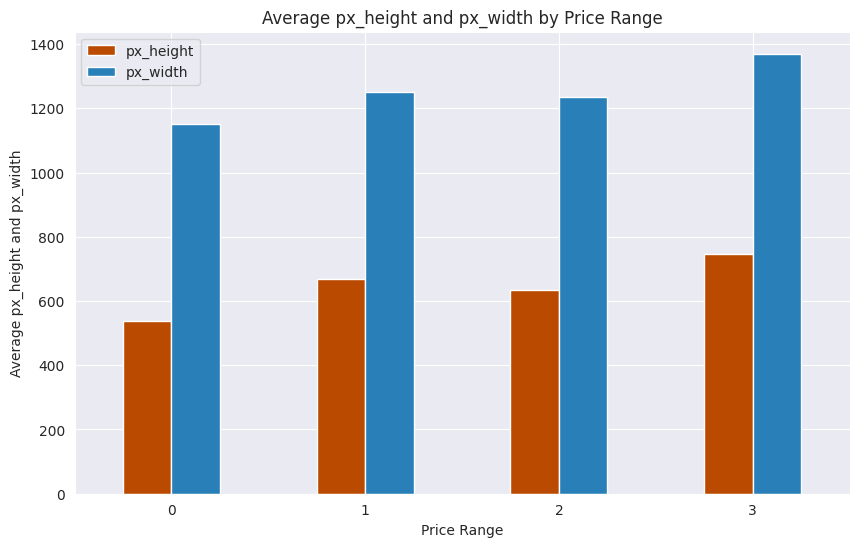

In [ ]:
# Group the data by 'price_range' and calculate the mean 'px_height' and 'px_width'
grouped_data = df.groupby('price_range')[['px_height', 'px_width']].mean()


# Define custom colors for the bars
custom_colors = ['#BA4A00', '#2980B9']

# Create a bar plot
grouped_data.plot(kind='bar', figsize=(10, 6), color=custom_colors)



# Customize the plot labels and title
plt.title('Average px_height and px_width by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average px_height and px_width')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

plt.show()


##### 1. Why did you pick the specific chart?

Show the counts of observations in each categorical bin using bars.

##### 2. What is/are the insight(s) found from the chart?

There is a notable connection between price and display resolution, particularly emphasizing the significance of higher px_width

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain insight to help creating a positive business impact.

#### Chart - 9

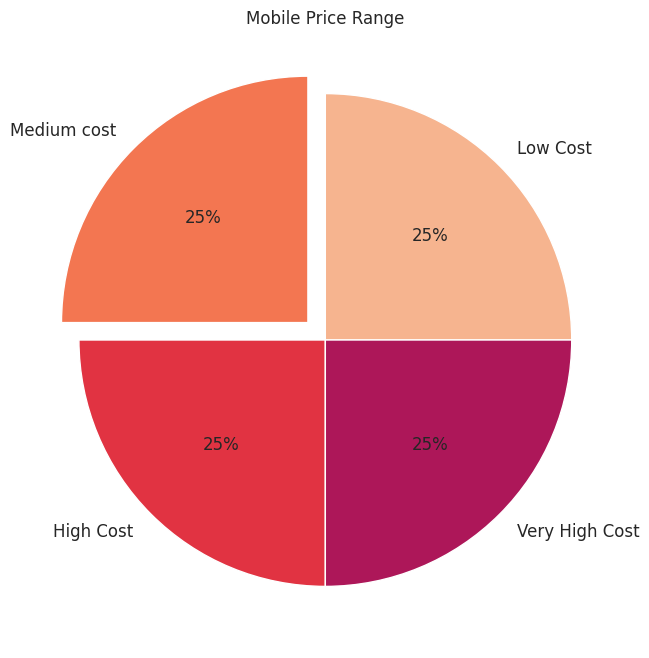

In [ ]:
# Chart - 9 visualization
fig = plt.figure(1, figsize=(8,8))
data = [(len(df[df.price_range==0])),(len(df[df.price_range==1])),(len(df[df.price_range==2])),(len(df[df.price_range==3])) ]
keys = ['Low Cost', 'Medium cost', 'High Cost', 'Very High Cost']
explode = [0, 0.1, 0, 0]
palette_color =sns.color_palette('rocket_r')[0:4]
plt.pie(data, labels=keys, colors=palette_color,explode=explode, autopct='%.0f%%',textprops={'fontsize': 12})
plt.title('Mobile Price Range')
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts typically show relative proportions of different categories in a data set.

##### 2. What is/are the insight(s) found from the chart?

There are mobile phones in 4 price ranges. so according this pie chart percentages of all Mobile price range almost similar.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It will not help much.Because costs are almost similar.

#### Chart - 10

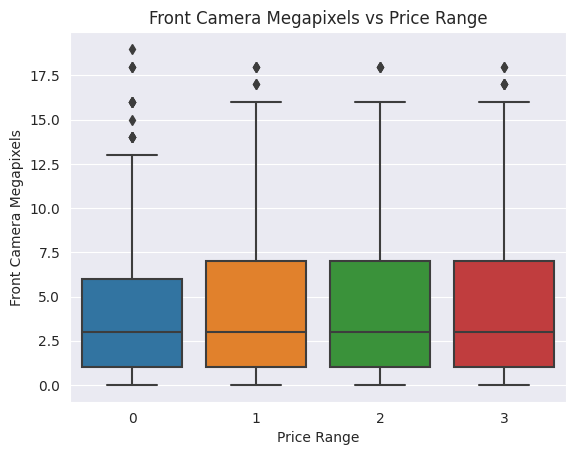

In [ ]:
# Chart - 10 visualization code
# Creating a boxplot using the 'boxplot' function from seaborn
ax = sns.boxplot(data=df, x='price_range', y='fc')

# Setting x and y axis labels and title
ax.set(xlabel='Price Range', ylabel='Front Camera Megapixels')
ax.set_title('Front Camera Megapixels vs Price Range')

# Showing the plot
plt.show()

##### 1. Why did you pick the specific chart?

A boxplot is commonly used to visualize the distribution and statistical summary of a continuous variable, such as front camera megapixels in this case, across different groups or categories, which is represented by price range.

##### 2. What is/are the insight(s) found from the chart?

It is observed that all the price ranges have almost the same median front camera megapixels. The price range 0 has a lower front camera megapixels range than price range 1, 2 and 3. Last but not the least, price range 0 has a more outliers than the other three price ranges.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The fact that the distribution of front camera megapixels is similar across all price ranges suggests that this particular feature alone may not be sufficient for accurately predicting the price range of devices.

#### Chart - 11

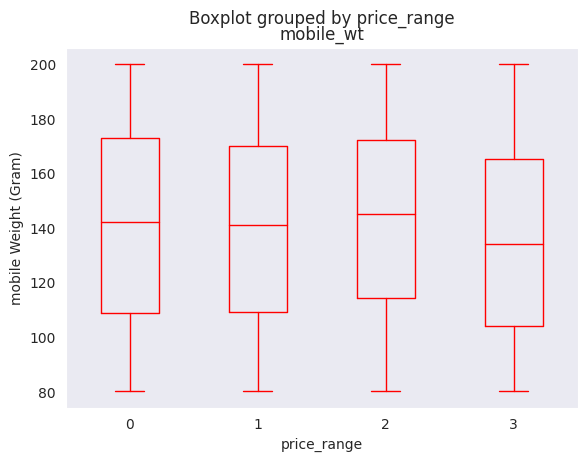

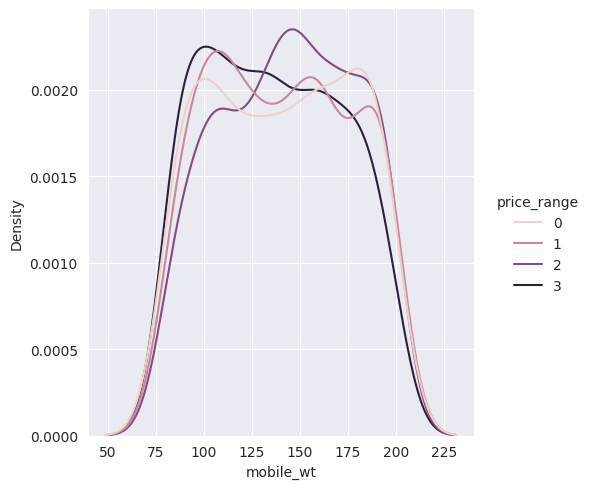

In [ ]:
# Chart - 11 visualization code
sns.set_style("darkgrid")
df.boxplot(by ='price_range', column =['mobile_wt'], grid = False,color='red'),
plt.ylabel("mobile Weight (Gram)")

sns.displot(data=df, x="mobile_wt", hue="price_range", kind="kde")

##### 1. Why did you pick the specific chart?

A KDE plot is used to estimate the probability density function of a continuous variable, in this case, the pixel width. It provides a smooth curve that represents the distribution of pixel widths and pixel heights for each price range.

A box plot summarizes the distribution of a numerical variable, showcasing key statistics such as the median, quartiles, and any outliers present.

##### 2. What is/are the insight(s) found from the chart?

we can see that in this boxplot,the costly phones are lighter in weight.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.it will help us to create a postitive business impact.

#### Chart - 12

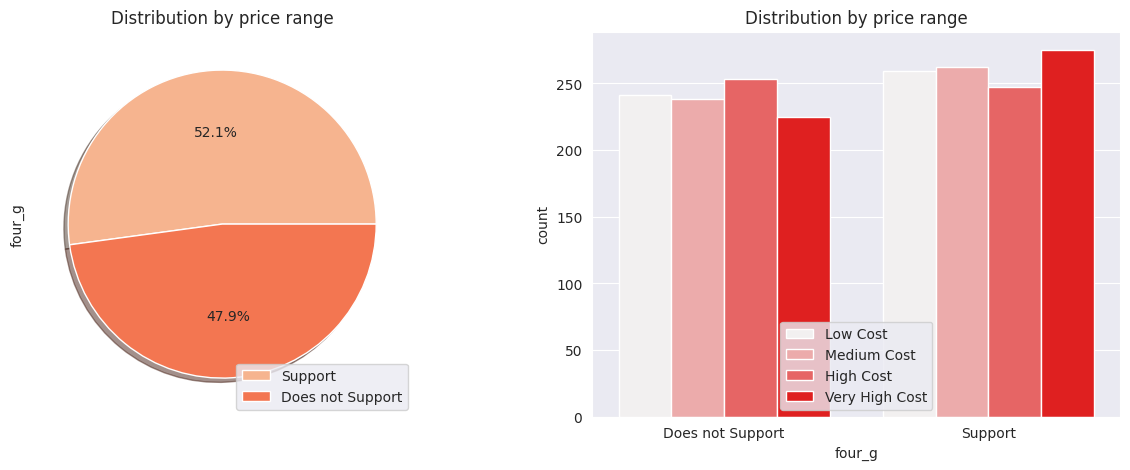

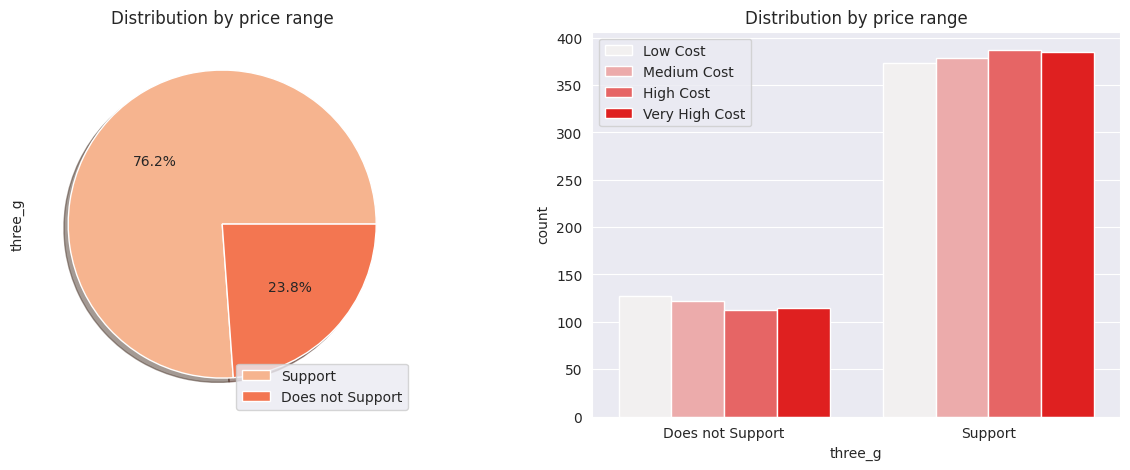

In [ ]:
# Chart - 12 visualization code
binary_features = [ 'four_g', 'three_g']
for dataset in binary_features:
  fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (15, 5))

  df[dataset].value_counts().plot.pie (autopct='%1.1f%%', ax = ax1,colors=palette_color, shadow=True,labeldistance=None)
  ax1.set_title('Distribution by price range')
  ax1.legend(['Support', 'Does not Support'])
  sns.countplot(x = dataset, hue = 'price_range', data = df, ax = ax2, color = 'red')
  ax2.set_title('Distribution by price range')
  ax2.set_xlabel(dataset)
  ax2.legend(['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'])
  ax2.set_xticklabels(['Does not Support', 'Support'])


##### 1. Why did you pick the specific chart?

To check the connectivity of 3G and 4G on mobiles.

##### 2. What is/are the insight(s) found from the chart?

Distribution of price range almost similar of supported and non supported feature in 4G . So that is not useful of prediction.

Feature 'three_g' play an important feature in Price prediction.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.it will help us to create a postitive business impact.

#### Chart - 13

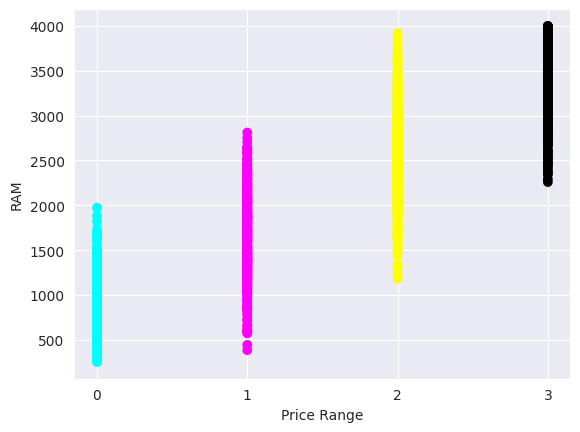

In [ ]:
# Chart - 13 visualization code

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Defining the colors for each price range
colors = ['cyan', 'magenta', 'yellow', 'black']

# Creating a colormap using the colors
cmap = mcolors.ListedColormap(colors)

# Creating the scatter plot
plt.scatter(df['price_range'], df['ram'], c = df['price_range'], cmap = cmap)
plt.xlabel('Price Range')
plt.ylabel('RAM')
plt.xticks([0, 1, 2, 3])
plt.show()


##### 1. Why did you pick the specific chart?

A scatter plot is commonly used to visualize the relationship between two continuous variables. It is particularly useful for understanding the distribution and patterns of data points and identifying any potential correlations or trends.

##### 2. What is/are the insight(s) found from the chart?

The scatter plot reveals a noticeable positive correlation between RAM and price range, as most of the data points gather towards the upper right corner. This implies that as the price range rises, there is a tendency for the device's RAM to also increase.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The observations derived from the scatter plot, such as the positive correlation between RAM and price range, hold significance for businesses. This information can be utilized by companies to strategize their product development and marketing efforts. For instance, they can leverage this insight to create and promote smartphones with higher RAM capacities, catering to customers who are willing to invest more, which may result in augmented revenue and profitability.

#### Chart - 14 - Correlation Heatmap

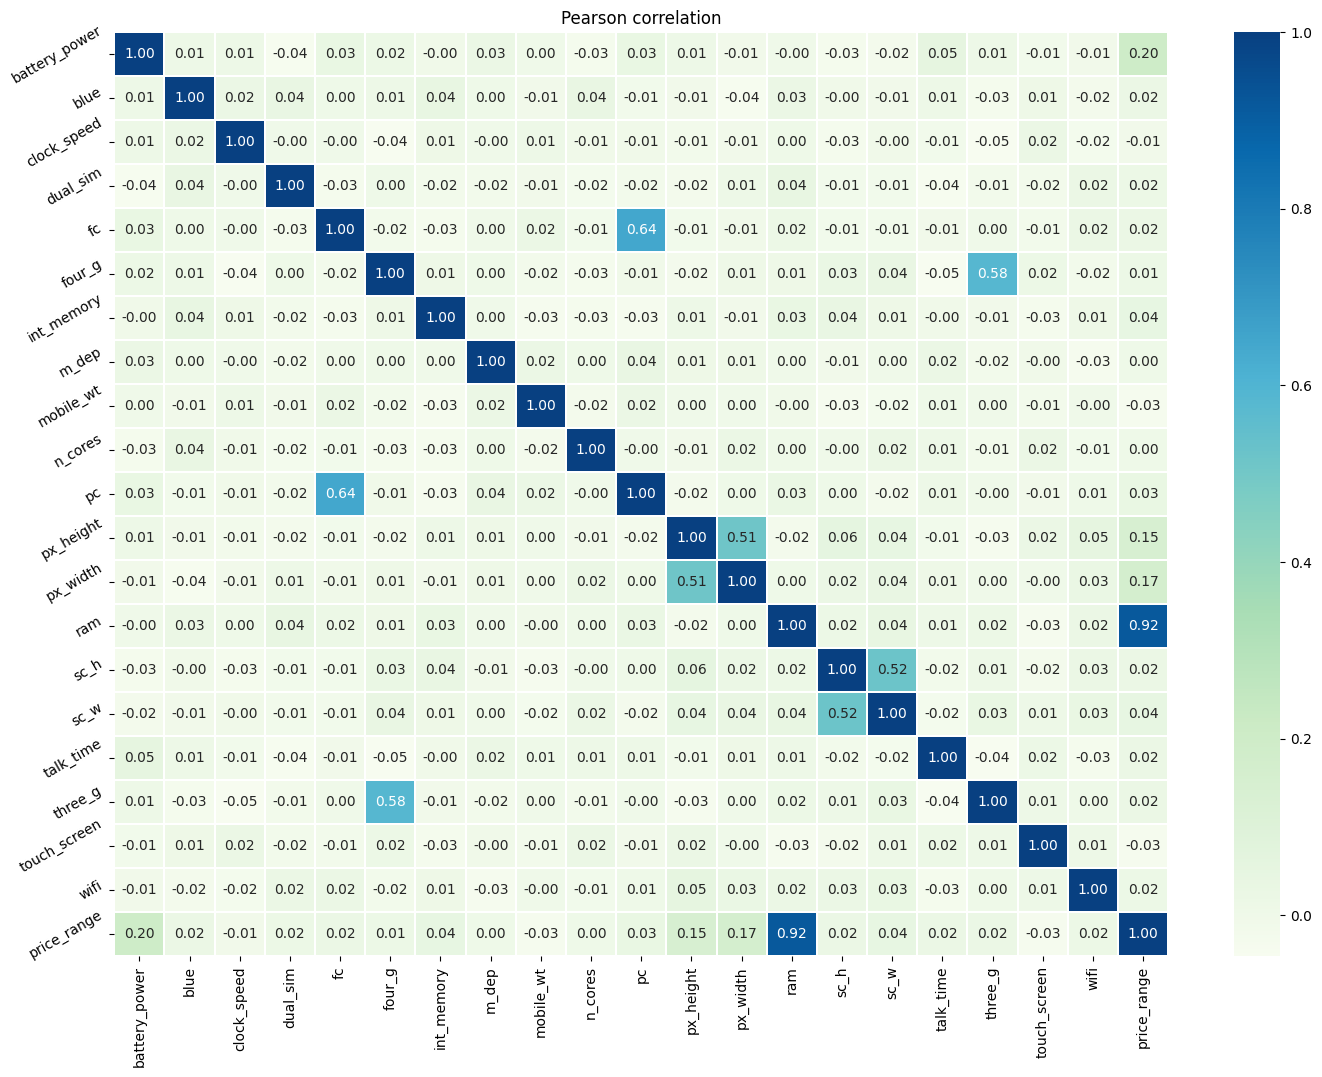

In [ ]:
# Correlation Heatmap visualization code
fig=plt.gcf()
fig.set_size_inches(17, 12)
plt.title('Pearson correlation')
a = sns.heatmap(df.corr(), annot = True, cmap = 'GnBu', fmt='.2f', linewidths=0.2)
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

##### 1. Why did you pick the specific chart?

To check the correlation between each features in the dataset. To assess the presence of multicollinearity.

##### 2. What is/are the insight(s) found from the chart?

1. **Influential Variable:** RAM appears to be the most influential variable in determining the price range.

2. **Limited Correlation with Price Range:** Most variables show little correlation with the price range.

3. **Camera Mega Pixels:** There is a correlation between primary camera mega pixels and front camera mega pixels, which makes sense as both reflect the technology level of resolution. However, neither significantly affects the price range.

4. **3G and 4G Correlation:** The presence of 3G and 4G is somewhat correlated.

5. **Multicollinearity:** There is no evidence of highly correlated inputs, indicating no multicollinearity issues in the dataset.

#### Chart - 15 - Pair Plot

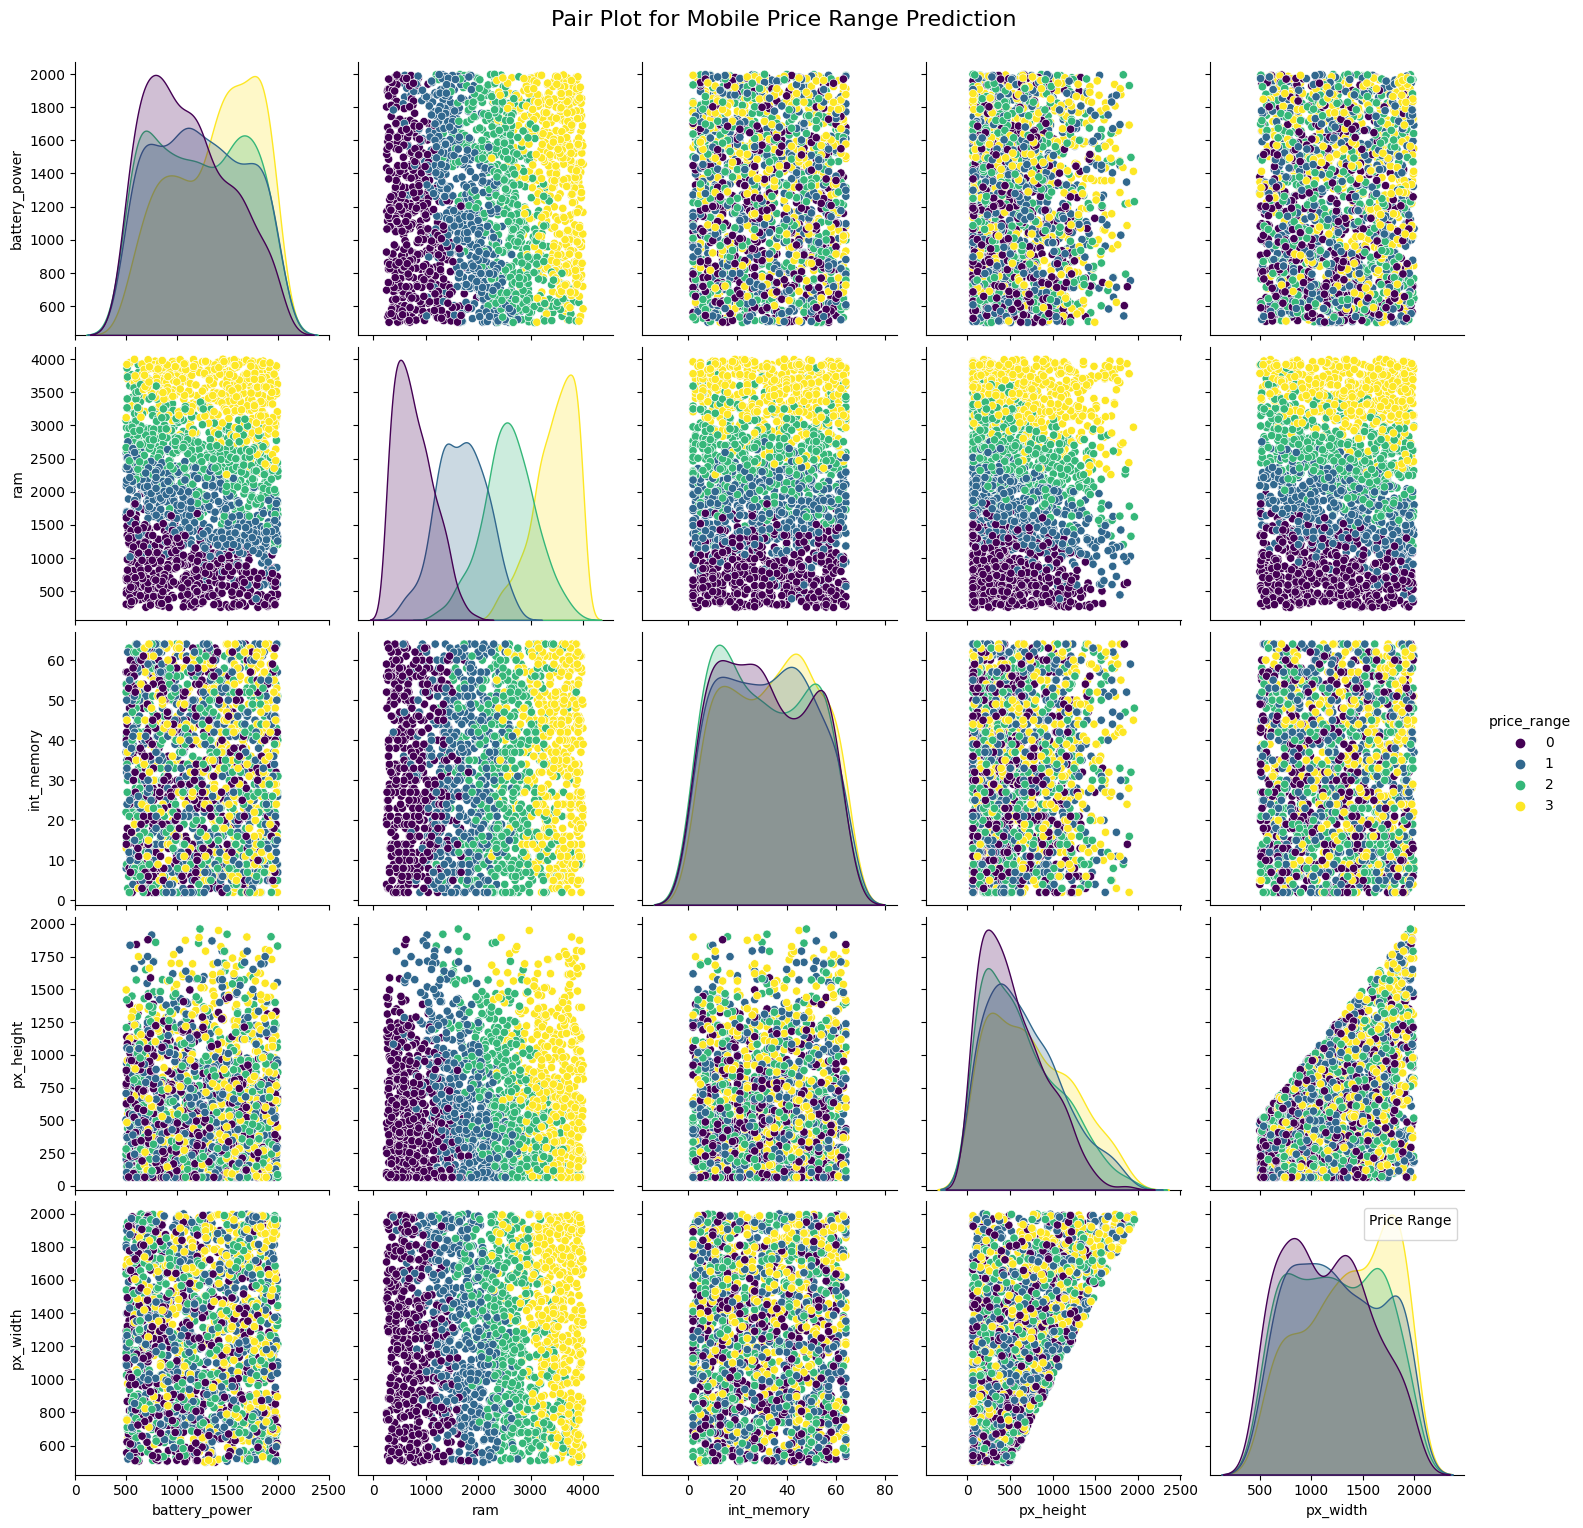

In [ ]:

# Define the numerical columns (exclude 'price_range')
num_cols = ['battery_power', 'ram', 'int_memory', 'px_height', 'px_width']

# Create a pair plot with a custom height
pairplot = sns.pairplot(data=df, vars=num_cols, hue='price_range', palette='viridis', height=3)  # Adjust height as needed

# Customize plot labels and titles
pairplot.fig.suptitle("Pair Plot for Mobile Price Range Prediction", y=1.02, fontsize=16)

# Add legends and labels
plt.legend(title='Price Range', loc='upper right')

# Set custom labels for x and y-axes
for i in range(len(num_cols)):
    for j in range(len(num_cols)):
        ax = pairplot.axes[i][j]
        if i == len(num_cols) - 1:
            ax.set_xlabel(num_cols[j])
        if j == 0:
            ax.set_ylabel(num_cols[i])

# Display the plot
plt.show()


##### 1. Why did you pick the specific chart?

The Pairplot allows us to plot pairwise relationships between variables within a dataset. This creates a nice visualisation and helps us understand the data by summarising a large amount of data in a single figure. This is essential when we are exploring our dataset and trying to become familiar with it

## ***5. Hypothesis Testing***

Hypothesis testing is a crucial statistical tool that helps researchers and analysts make informed decisions and draw valid conclusions about populations based on sample data.

**Hypothesis-1**

***Null Hypothesis:*** There is no significant difference in the mean prices of mobiles with and without 4G capability.

***Alternative Hypothesis:*** There is a significant difference in the mean prices of mobiles with and without 4G capability.

In [ ]:
from scipy.stats import f_oneway


# Extracting the relevant columns for the analysis
four_g_prices = df[df['four_g'] == 1]['price_range']
no_four_g_prices = df[df['four_g'] == 0]['price_range']

# Performing ANOVA test
f_statistic, p_value = f_oneway(four_g_prices, no_four_g_prices)

# Output the results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Interpretation of results
if p_value < 0.05:
    print("Reject the null hypothesis. There is evidence that mobiles with 4G capability are priced differently from those without.")
else:
    print("Fail to reject the null hypothesis. There is no significant evidence that mobiles with 4G capability are priced differently.")


F-statistic: 0.43606566050713613
P-value: 0.5091036529767595
Fail to reject the null hypothesis. There is no significant evidence that mobiles with 4G capability are priced differently.


 Since We have a categorical column 'four_g' (indicating the presence or absence of 4G), and 'price_range' is also categorical, a suitable test could be the analysis of variance (ANOVA)

**Hypothesis-2**

***Null Hypothesis:*** The clock speed of the processor does not affect the mobile price range.

***Alternative Hypothesis:*** The clock speed of the processor affects the mobile price range.

In [ ]:
import statsmodels.api as sm


# Adding a constant term for the intercept in the regression model
X = sm.add_constant(df['clock_speed'])

# Fit the regression model
model = sm.OLS(df['price_range'], X).fit()

# Display the summary of the regression
print(model.summary())

# Extract p-value for 'clock_speed'
p_value_clock_speed = model.pvalues['clock_speed']

# Interpretation of the p-value
alpha = 0.05  # significance level
print("\nHypothesis Testing:")
print(f"P-value for 'clock_speed': {p_value_clock_speed}")
if p_value_clock_speed < alpha:
    print("Reject the null hypothesis. There is evidence that clock speed affects the mobile price range.")
else:
    print("Fail to reject the null hypothesis. There is no significant evidence that clock speed affects the mobile price range.")


                            OLS Regression Results                            
Dep. Variable:            price_range   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.08719
Date:                Fri, 10 Nov 2023   Prob (F-statistic):              0.768
Time:                        14:00:16   Log-Likelihood:                -3061.0
No. Observations:                2000   AIC:                             6126.
Df Residuals:                    1998   BIC:                             6137.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.5138      0.053     28.588      

**Interpretation:**
The model, as a whole, is not statistically significant, and the independent variable ('clock_speed') does not significantly explain the variation in 'price_range'.
The coefficient for 'clock_speed' is not statistically significant as p-value is greater than 0.05 that is 0.768, and the low R-squared suggests that this variable does not provide much explanatory power.

**Hypothesis-3**

***Null Hypothesis:*** There is no significant difference in mean talk time among the four price range categories.

***Alternative Hypothesis:*** There is a significant difference in mean talk time among the four price range categories.

In [ ]:
# Set up the variables
talk_time = df['talk_time']
price_range = df['price_range']

# Perform ANOVA test
f_statistic, p_value = f_oneway(talk_time[price_range == 0],
                                talk_time[price_range == 1],
                                talk_time[price_range == 2],
                                talk_time[price_range == 3])

# Print the results
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Check for statistical significance
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant association between talk time and price range.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between talk time and price range.")


F-statistic: 1.6288113087355847
P-value: 0.18066864736912272
Fail to reject the null hypothesis. There is no significant association between talk time and price range.


## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

**Missing values already handled**

### 2. Handling Outliers

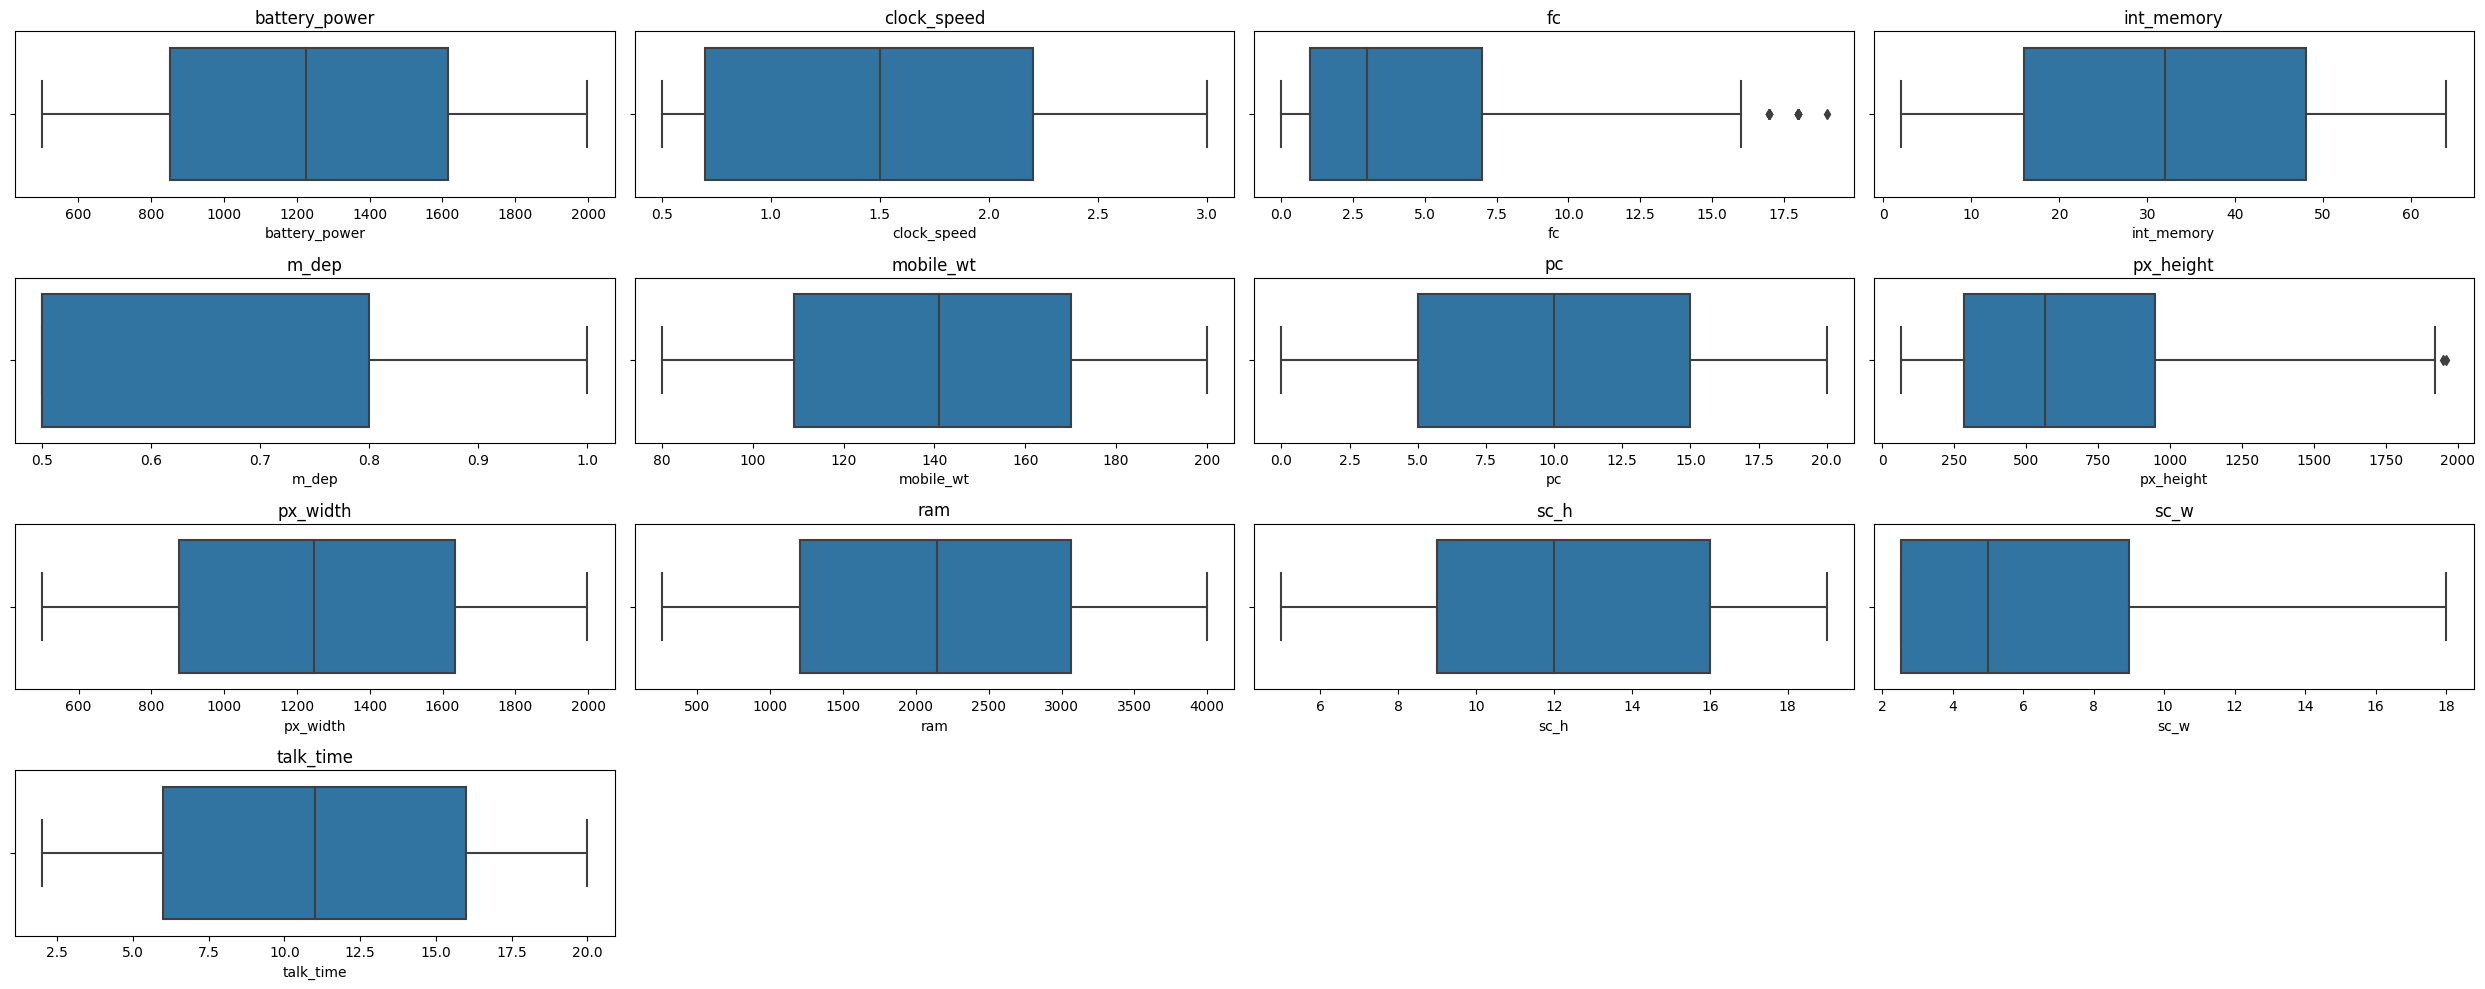

In [ ]:
# looking for outliers using box plot
num_cols = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

# Create a grid of box plots
plt.figure(figsize=(25, 10))

for index, item in enumerate(num_cols):
    plt.subplot(4, 4, index + 1)
    sns.boxplot(x=df[item])
    plt.title(item)

plt.tight_layout()
plt.show()


There are no much outliers presented in dataset

### 3. Feature Selection

Performing feature selection and retain only the most relevant features for machine learning model based on the chi-squared statistical test.

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
# Extracting the features (all columns except 'price_range')
x = df.drop('price_range', axis=1)
# Extracting the target variable ('price_range') and reshaping it to a 2D array
y = df['price_range'].values.reshape(-1, 1)


In [ ]:
# Select features wisely to avoid overfitting
order_rank_features=SelectKBest(score_func=chi2,k=15)
order_feature=order_rank_features.fit(x,y)

In [ ]:
df_scores=pd.DataFrame(order_feature.scores_,columns=["Score"])
df_columns=pd.DataFrame(x.columns)

In [ ]:
features_rank=pd.concat([df_columns,df_scores],axis=1)
features_rank.columns=['Features','Score']
features_rank.sort_values(by='Score', ascending=False)

Features          Score
13            ram  931267.519053
11      px_height   17247.784155
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      15.800054
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878
10             pc       9.186054
9         n_cores       9.097556
18   touch_screen       1.928429
5          four_g       1.521572
1            blue       0.723232
2     clock_speed       0.648366
3        dual_sim       0.631011
19           wifi       0.422091
17        three_g       0.327643
7           m_dep       0.121342

### 4. Data Transformation

In [ ]:
final_df=df

In [ ]:
X=final_df[['battery_power','fc', 'four_g',
       'int_memory', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time','touch_screen'
       ]]

Y=final_df['price_range'].values.reshape(-1, 1)

In [ ]:
# Checking X
print(X.columns)

Index(['battery_power', 'fc', 'four_g', 'int_memory', 'mobile_wt', 'n_cores',
       'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time',
       'touch_screen'],
      dtype='object')


### 5. Handling Imbalanced Dataset

In [ ]:
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

The above charts show that all classes of the target variable have the **same count**. So, the target data is **completely balanced**.

### 6. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# check the shape of X_train, X_test, y_train and y_test
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (1600, 14)
X_test shape:  (400, 14)
y_train shape:  (1600, 1)
y_test shape:  (400, 1)


In [ ]:
X_train

battery_power  fc  four_g  int_memory  mobile_wt  n_cores  pc  \
968            1923   7       0          46        191        1  10   
240             633   0       1          49        139        8   1   
819            1236   2       1          57        188        1  14   
692             781   2       0          38        198        5   7   
420            1456   7       0           7        105        5  12   
...             ...  ..     ...         ...        ...      ...  ..   
1130           1975   2       0          31        151        1  17   
1294            589   1       1          59        146        8   4   
860            1829   0       1          15        160        5   7   
1459           1927   3       0          11        190        8  12   
1126            635   1       1          50         97        5  13   

      px_height  px_width   ram  sc_h   sc_w  talk_time  touch_screen  
968         767      1759  1489    10   9.00          3             1  
240         529      1009  3560    11   2.54         16             1  
819         517       809  1406    14  12.00         20             0  
692         304      1674  3508    13   8.00          5             0  
420         823      1104  1587     6   5.00         20             0  
...         ...       ...   ...   ...    ...        ...           ...  
1130        775      1607  3022    13   5.00         19             0  
1294        759      1858   362    16  10.00          6             1  
860         729      1267  2080    16  11.00         12             0  
1459        491      1506  2916    16  11.00         18             1  
1126        193       989  2107    13  12.00         12             0  

[1600 rows x 14 columns]

In [ ]:
X_test

battery_power  fc  four_g  int_memory  mobile_wt  n_cores  pc  \
1860           1646   3       1          25        200        2   5   
353            1182   7       1           8        138        8  16   
1333           1972   9       0          14        196        7  18   
905             989   4       0          17        166        3  19   
1289            615   7       0          58        130        5   8   
...             ...  ..     ...         ...        ...      ...  ..   
965            1379   1       0          19        134        8  17   
1284            991   2       1          12        158        5   6   
1739           1044   4       1          12        104        6   5   
261             728   0       0          25         88        4   1   
535            1185   0       0          31        152        8   7   

      px_height  px_width   ram  sc_h   sc_w  talk_time  touch_screen  
1860        211      1608   686     8   6.00         11             1  
353         275       986  2563    19  17.00         19             0  
1333        293       952  1316     8   2.54          8             1  
905         256      1394  3892    18   7.00         19             1  
1289       1021      1958  1906    14   5.00          5             0  
...         ...       ...   ...   ...    ...        ...           ...  
965         387       671  3912    11   2.54         19             1  
1284       1209      1678  2014    11   9.00         10             0  
1739       1230      1263  1794    18   7.00         19             1  
261         526      1529  2039     5   2.54         12             1  
535         837      1642  2447    16   2.54          3             1  

[400 rows x 14 columns]

## ***7. ML Model Implementation***

### **Logistic regression**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(solver='lbfgs', fit_intercept=True, max_iter=10000)

# Train the model
logistic_model.fit(X_train_scaled, y_train)

# Predict on the training set
log_y_pred_train = logistic_model.predict(X_train_scaled)

# Predict on the testing set
log_y_pred_test = logistic_model.predict(X_test_scaled)

# Evaluate the model
log_accuracy_train = accuracy_score(y_train, log_y_pred_train)
log_accuracy_test = accuracy_score(y_test, log_y_pred_test)

log_precision_train = precision_score(y_train, log_y_pred_train, average='weighted')
log_precision_test = precision_score(y_test,log_y_pred_test, average='weighted')

log_recall_train = recall_score(y_train, log_y_pred_train, average='weighted')
log_recall_test = recall_score(y_test, log_y_pred_test, average='weighted')

conf_matrix_train = confusion_matrix(y_train, log_y_pred_train)
conf_matrix_test = confusion_matrix(y_test, log_y_pred_test)


classification_report_test = classification_report(y_test, log_y_pred_test)

# Print the results
print("Training Accuracy: {:.2f}%".format(log_accuracy_train * 100))
print("Testing Accuracy: {:.2f}%".format(log_accuracy_test * 100))

print("\nPrecision (Training): {:.2f}".format(log_precision_train))
print("Precision (Testing): {:.2f}".format(log_precision_test))

print("\nRecall (Training): {:.2f}".format(log_recall_train))
print("Recall (Testing): {:.2f}".format(log_recall_test))

print("\nConfusion Matrix (Training):\n", conf_matrix_train)
print("\nConfusion Matrix (Testing):\n", conf_matrix_test)


print("\nClassification Report (Testing):\n", classification_report_test)


Training Accuracy: 97.81%
Testing Accuracy: 98.25%

Precision (Training): 0.98
Precision (Testing): 0.98

Recall (Training): 0.98
Recall (Testing): 0.98

Confusion Matrix (Training):
 [[393   2   0   0]
 [  7 395   7   0]
 [  0   9 394   5]
 [  0   0   5 383]]

Confusion Matrix (Testing):
 [[104   1   0   0]
 [  0  91   0   0]
 [  0   2  88   2]
 [  0   0   2 110]]

Classification Report (Testing):
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       105
           1       0.97      1.00      0.98        91
           2       0.98      0.96      0.97        92
           3       0.98      0.98      0.98       112

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd

def plot_confusion_matrix(y_true, y_pred, labels=None, figsize=(6, 6), cmap="Blues"):
    """
    Plot a confusion matrix heatmap.

    Parameters:
    - y_true: true labels
    - y_pred: predicted labels
    - labels: list of class labels (optional, default=None)
    - figsize: size of the figure (optional, default=(6, 6))
    - cmap: colormap for the heatmap (optional, default="Blues")

    Returns:
    - None (displays the heatmap)
    """

    cm = confusion_matrix(y_true, y_pred, labels=labels)

    if labels is None:
        labels = [str(i) for i in range(len(cm))]

    df_cm = pd.DataFrame(columns=labels, index=labels, data=cm)

    f, ax = plt.subplots(figsize=figsize)
    sns.heatmap(df_cm, annot=True, cmap=cmap, fmt='g', ax=ax,
                linewidths=1, cbar=False, annot_kws={"size": 12})

    plt.xlabel("Predicted Label")
    plt.xticks(size=12)
    plt.yticks(size=12, rotation=0)
    plt.ylabel("True Label")
    plt.title("Confusion Matrix", size=12)
    plt.show()

# Example usage:
# Assuming y_test and y_pred are your true and predicted labels
# plot_confusion_matrix(y_test, y_pred)


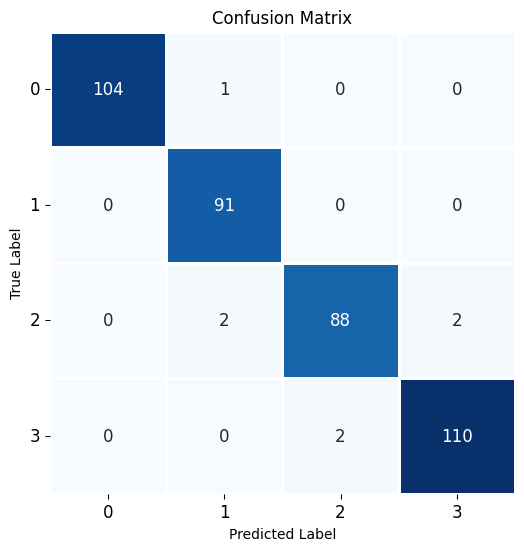

In [ ]:
plot_confusion_matrix(y_test, log_y_pred_test)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
# Perform k-fold cross-validation (e.g., 5-fold)
k = 5
scores = cross_val_score(logistic_model, X_train, y_train, cv=k, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())


Cross-validation scores: [0.7625   0.765625 0.7375   0.74375  0.746875]
Mean accuracy: 0.75125


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the logistic regression classifier
classifier = LogisticRegression()

# Define the hyperparameters to tune
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'max_iter': [100, 200, 300]
}

# Create the grid search object
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the training and testing sets
y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)

# Evaluate accuracy
log_best_accuracy_train = accuracy_score(y_train, y_train_pred)
log_best_accuracy_test = accuracy_score(y_test, y_test_pred)

# Print the results
print("Best Parameters:", best_params)
print("Training Accuracy: {:.2f}%".format(log_best_accuracy_train * 100))
print("Testing Accuracy: {:.2f}%".format(log_best_accuracy_test * 100))



Best Hyperparameters: {'C': 100, 'max_iter': 100, 'penalty': 'l2'}
Best Parameters: {'C': 100, 'max_iter': 100, 'penalty': 'l2'}
Training Accuracy: 98.69%
Testing Accuracy: 97.75%


### **RandomForestClassifier**

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score

# Create a Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

# Train the classifier
random_forest.fit(X_train, y_train)

# Predictions on the training and testing sets
rf_y_pred_train = random_forest.predict(X_train)
rf_y_pred_test = random_forest.predict(X_test)

# Evaluate the classifier
rf_accuracy_train = accuracy_score(y_train, rf_y_pred_train)
rf_accuracy_test = accuracy_score(y_test, rf_y_pred_test)

conf_matrix_train = confusion_matrix(y_train, rf_y_pred_train)
conf_matrix_test = confusion_matrix(y_test, rf_y_pred_test)

class_report_test = classification_report(y_test, rf_y_pred_test)

# Calculate precision and recall
rf_precision_test = precision_score(y_test, rf_y_pred_test, average='weighted')
rf_recall_test = recall_score(y_test, rf_y_pred_test, average='weighted')

# Print the results
print("Accuracy on training set: {:.2f}%".format(rf_accuracy_train * 100))
print("Accuracy on testing set: {:.2f}%".format(rf_accuracy_test * 100))

# Print Precision and Recall
print("\nPrecision on Testing Set: {:.2f}".format(rf_precision_test))
print("Recall on Testing Set: {:.2f}".format(rf_recall_test))

print("\nConfusion Matrix on Testing Set:")
print(conf_matrix_test)

print("\nClassification Report on Testing Set:")
print(class_report_test)



<ipython-input-46-567aa8796816>:18: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Accuracy on training set: 100.00%
Accuracy on testing set: 90.00%

Precision on Testing Set: 0.90
Recall on Testing Set: 0.90

Confusion Matrix on Testing Set:
[[101   4   0   0]
 [  6  81   4   0]
 [  0   8  78   6]
 [  0   0  12 100]]

Classification Report on Testing Set:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       105
           1       0.87      0.89      0.88        91
           2       0.83      0.85      0.84        92
           3       0.94      0.89      0.92       112

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



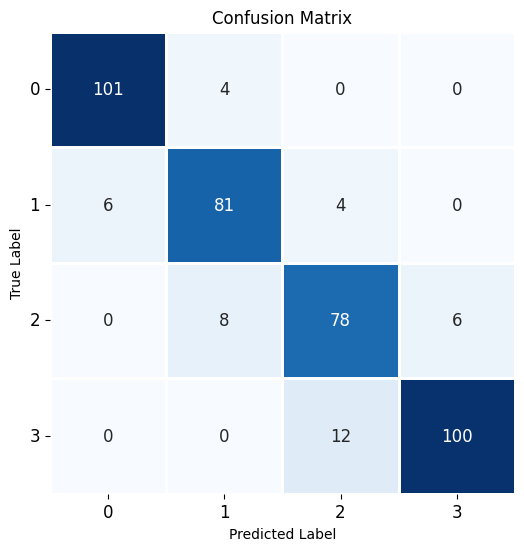

In [ ]:
plot_confusion_matrix(y_test, rf_y_pred_test)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


# Define the Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Define the hyperparameters grid for tuning
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 2]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Train the model with the best parameters
best_rf_model = RandomForestClassifier(**best_params)
best_rf_model.fit(X_train, y_train)

# Make predictions on the test and train sets
y_pred_test = best_rf_model.predict(X_test)
y_pred_train = best_rf_model.predict(X_train)

# Evaluate the model
rf_best_accuracy_test = accuracy_score(y_test, y_pred_test)
rf_best_accuracy_train = accuracy_score(y_train, y_pred_train)

classification_report_test = classification_report(y_test, y_pred_test)
classification_report_train = classification_report(y_train, y_pred_train)

# Print the results
print("Best Hyperparameters:", best_params)
print("Accuracy on training set: {:.2f}%".format(rf_best_accuracy_train * 100))
print("Accuracy on testing set: {:.2f}%".format(rf_best_accuracy_test * 100))
print("\nClassification Report (Test Set):\n", classification_report_test)
print("\nClassification Report (Train Set):\n", classification_report_train)


<ipython-input-28-94ed406a6b0e>:26: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}
Accuracy on training set: 100.00%
Accuracy on testing set: 88.50%

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       105
           1       0.85      0.89      0.87        91
           2       0.80      0.82      0.81        92
           3       0.92      0.88      0.90       112

    accuracy                           0.89       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.89      0.89      0.89       400


Classification Report (Train Set):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       395
           1       1.00      1.00      1.00       409
           2       1.00      1.00      1.00       408
           3       1.00      1.00      1.00       388

    accuracy                           1.00 

### **XGBClassifier**

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score

# Initialize the XGBoost classifier
xgb_model = XGBClassifier(
    objective='multi:softmax',
    num_class=4,
    eval_metric='mlogloss',
    learning_rate=0.1,
    max_depth=6,
    n_estimators=100,
    subsample=0.8,
    colsample_bytree=0.8,
    seed=42
)

# Fit the model on the training data
xgb_model.fit(X_train, y_train)

# Predict on the training set
xg_y_pred_train = xgb_model.predict(X_train)

# Predict on the test set
xg_y_pred_test = xgb_model.predict(X_test)

# Evaluate the model
xg_accuracy_train = accuracy_score(y_train, xg_y_pred_train)
xg_accuracy_test = accuracy_score(y_test, xg_y_pred_test)

# Calculate precision and recall for training set
xg_precision_train = precision_score(y_train, xg_y_pred_train, average='weighted')
xg_recall_train = recall_score(y_train, xg_y_pred_train, average='weighted')

# Calculate precision and recall for test set
xg_precision_test = precision_score(y_test, xg_y_pred_test, average='weighted')
xg_recall_test = recall_score(y_test, xg_y_pred_test, average='weighted')

print("Training Accuracy: {:.2f}%".format(xg_accuracy_train * 100))
print("Testing Accuracy: {:.2f}%".format(xg_accuracy_test * 100))

# Print precision and recall for training set
print("\nTraining Precision: {:.2f}".format(xg_precision_train))
print("Training Recall: {:.2f}".format(xg_recall_train))

# Print precision and recall for test set
print("\nTesting Precision: {:.2f}".format(xg_precision_test))
print("Testing Recall: {:.2f}".format(xg_recall_test))

# Print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, xg_y_pred_test))

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, xg_y_pred_test))


Training Accuracy: 100.00%
Testing Accuracy: 90.75%

Training Precision: 1.00
Training Recall: 1.00

Testing Precision: 0.91
Testing Recall: 0.91

Confusion Matrix:
[[ 99   6   0   0]
 [  4  86   1   0]
 [  0   9  77   6]
 [  0   0  11 101]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       105
           1       0.85      0.95      0.90        91
           2       0.87      0.84      0.85        92
           3       0.94      0.90      0.92       112

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



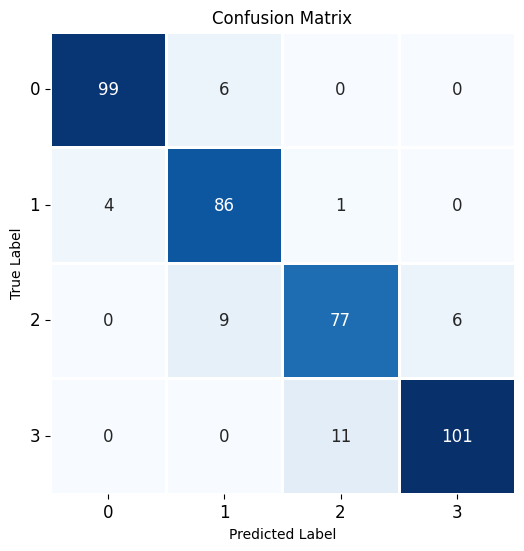

In [ ]:
plot_confusion_matrix(y_test, xg_y_pred_test)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation using cross_val_score
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Print the mean and standard deviation of the scores
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())


Cross-Validation Scores: [0.925    0.9      0.89375  0.890625 0.896875]
Mean Accuracy: 0.9012499999999999
Standard Deviation: 0.012279301690242826


In [ ]:
# Create an XGBoost classifier
xgb_model = XGBClassifier()

# Define the hyperparameters to tune
param_grid = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [50, 100],
    'max_depth': [3, 4],
}

# Create the grid search object
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_xgb_model = grid_search.best_estimator_

# Make predictions on the training and testing sets
y_train_pred = best_xgb_model.predict(X_train)
y_test_pred = best_xgb_model.predict(X_test)

# Evaluate accuracy
xg_best_accuracy_train = accuracy_score(y_train, y_train_pred)
xg_best_accuracy_test = accuracy_score(y_test, y_test_pred)

# Get confusion matrix and classification report for the test set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
classification_report_test = classification_report(y_test, y_test_pred)

# Print the results
print("Best Parameters:", best_params)
print("Training Accuracy: {:.2f}%".format(xg_best_accuracy_train * 100))
print("Testing Accuracy: {:.2f}%".format(xg_best_accuracy_test * 100))
print("\nConfusion Matrix (Test):\n", conf_matrix_test)
print("\nClassification Report (Test):\n", classification_report_test)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
Training Accuracy: 99.81%
Testing Accuracy: 90.50%

Confusion Matrix (Test):
 [[ 98   7   0   0]
 [  4  84   3   0]
 [  0   9  78   5]
 [  0   0  10 102]]

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.96      0.93      0.95       105
           1       0.84      0.92      0.88        91
           2       0.86      0.85      0.85        92
           3       0.95      0.91      0.93       112

    accuracy                           0.91       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.91      0.91      0.91       400



**Comparision of models based on evaluation metrics**

In [ ]:
log_acc, log_precision, log_recall = log_accuracy_test,log_precision_test,log_recall_test
rf_acc, rf_precision, rf_recall = rf_accuracy_test, rf_precision_test,rf_recall_test
xgb_acc, xgb_precision, xgb_recall = xg_accuracy_test,xg_precision_test,xg_recall_test

# Create a dictionary with the model information
models_data = {
    'Models': ['Logistic Regression', 'Random Forest', 'XG Boost'],
    'Accuracy': [log_acc, rf_acc, xgb_acc],
    'Precision': [log_precision, rf_precision, xgb_precision],
    'Recall': [log_recall, rf_recall, xgb_recall],
}

# Create a DataFrame from the dictionary
models_df = pd.DataFrame(models_data)

# Sort the DataFrame by Accuracy in descending order
models_df.sort_values(by='Accuracy', ascending=False, inplace=True)

# Print the DataFrame
print(models_df)


                Models  Accuracy  Precision  Recall
0  Logistic Regression    0.9825   0.982628  0.9825
2             XG Boost    0.9075   0.909307  0.9075
1        Random Forest    0.9000   0.900928  0.9000


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Accuracy is a commonly used metric that provides an overall measure of correct predictions. It is suitable when classes are balanced and in our dataset classed are balanced

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Logistic Regression outperforms the other two classification methods, while Random Forest and XG Boost exhibit comparable performance.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Top 10 Important Features:
          Feature  Coefficient  Absolute Coefficient
9             ram   -10.897502             10.897502
0   battery_power    -2.740214              2.740214
7       px_height    -1.646199              1.646199
8        px_width    -1.502075              1.502075
4       mobile_wt     0.417634              0.417634
3      int_memory    -0.140855              0.140855
13   touch_screen     0.066941              0.066941
5         n_cores    -0.052527              0.052527
10           sc_h    -0.044465              0.044465
12      talk_time    -0.030163              0.030163


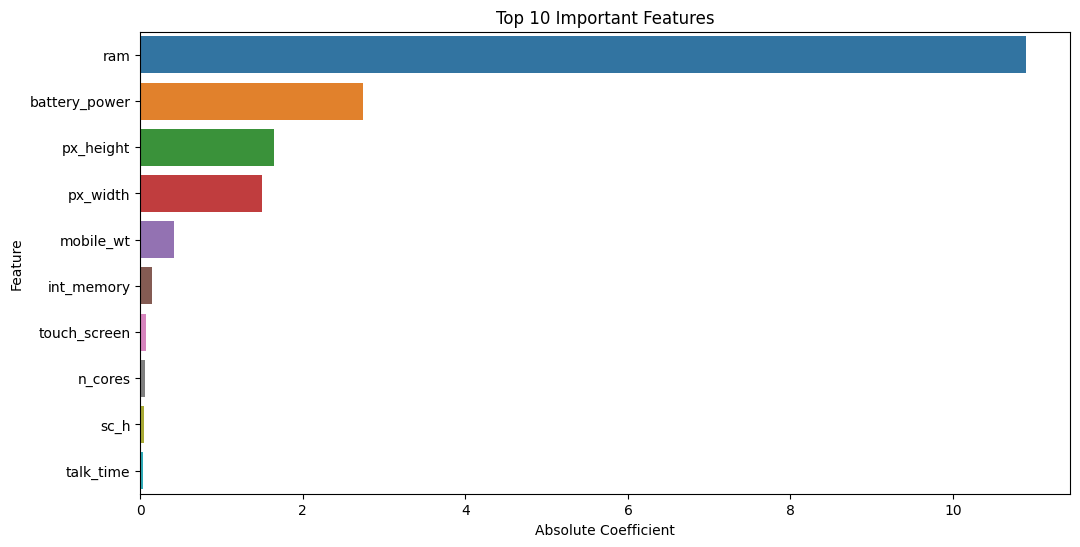

In [ ]:
# Get the feature names from the original DataFrame
feature_names = X.columns

# Get the coefficients from the trained logistic regression model
coefficients = logistic_model.coef_[0]

# Create a DataFrame to store feature names and their corresponding coefficients
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by the absolute values of the coefficients
feature_importance_df['Absolute Coefficient'] = feature_importance_df['Coefficient'].abs()
feature_importance_df = feature_importance_df.sort_values(by='Absolute Coefficient', ascending=False)

# Print the top 10 important features
top_n = 10
print("Top {} Important Features:".format(top_n))
print(feature_importance_df.head(top_n))
# plotting a graph
plt.figure(figsize=(12, 6))
sns.barplot(x='Absolute Coefficient', y='Feature', data=feature_importance_df.head(top_n), orient='h')
plt.title('Top {} Important Features'.format(top_n))
plt.show()


The coefficient values in a logistic regression model represent the log-odds of the target variable (in this case, the price range) given a one-unit increase in the corresponding feature. The larger the absolute value of the coefficient, the greater the impact that particular feature has on the predicted outcome.

let's interpret the top three features based on their absolute coefficients:

1. **RAM (`ram`):**
   - **Coefficient:** -10.897502
   - **Interpretation:** A one-unit increase in RAM is associated with a decrease in the log-odds of the target variable (price range) by approximately 10.90. In simpler terms, as RAM increases, the device is less likely to be in a higher price range.

2. **Battery Power (`battery_power`):**
   - **Coefficient:** -2.740214
   - **Interpretation:** A one-unit increase in battery power is associated with a decrease in the log-odds of the target variable by approximately 2.74. This suggests that devices with higher battery power are less likely to be in a higher price range.

3. **Pixel Height (`px_height`):**
   - **Coefficient:** -1.646199
   - **Interpretation:** A one-unit increase in pixel height is associated with a decrease in the log-odds of the target variable by approximately 1.65. Devices with higher pixel height are less likely to be in a higher price range.

# **Conclusion**

Certainly! Here's a paraphrased summary of observations and results:

1. **Price Ranges and Distribution:**
   - The dataset comprises mobile phones classified into four price ranges, each with a similar number of elements.

2. **Bluetooth Presence:**
   - Approximately half of the devices have Bluetooth, while the other half do not.

3. **Battery and Price Relationship:**
   - There is a gradual increase in battery capacity as the price range of mobile phones increases.

4. **RAM and Price Relationship:**
   - RAM exhibits a continuous increase in capacity with the rise in price range, indicating its significance in determining the phone's cost.

5. **Weight and Cost Relationship:**
   - Costly phones tend to be lighter, suggesting an inverse relationship between weight and price range.

6. **Significant Features:**
   - RAM, battery power, and pixel specifications play a more significant role in determining the price range of mobile phones.

7. **Classification Models:**
   - Implemented three classification models: Logistic Regression, Random Forest, and XG Boost.

8. **Model Performance:**
   - Achieved fairly good results for all three algorithms.
   - Logistic Regression achieved an accuracy of approximately 98%, while Random Forest and XG Boost showed around 90% accuracy.

9. **Data Classification:**
   - The high accuracy suggests that the data were well-classified by the models.

10. **Model Comparison:**
    - Logistic Regression outperformed the other two models in terms of accuracy.

In summary, the analysis indicates that certain features, especially RAM, battery power, and pixel specifications, play a crucial role in determining the price range of mobile phones. The implemented classification models, particularly Logistic Regression, demonstrated effective performance in classifying the data into the specified price ranges.